<a href="https://colab.research.google.com/github/juniismai02/tesis-kanker-kulit-tf-vggnet-mobilenet-juniismail-/blob/main/jurnal_kanker_kulit_mobilenet_vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TensorFlow version: 2.18.0
Num GPUs Available:  1
Name: /physical_device:GPU:0  Type: GPU
Enabling mixed precision training
Compute dtype: float16
Variable dtype: float32
Dataset sudah ada.
Metadata path exists: True
Dataset dir 1 exists: True
Dataset dir 2 exists: True
Dataset shape: (10015, 7)
     lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear
Jumlah path gambar yang valid: 10015
Contoh path gambar: /content/skin-cancer-data/HAM10000_images_part_1/ISIC_0027419.jpg
Dataset shape setelah menghapus path invalid: (10015, 8)

Informasi Metadata:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 8 co

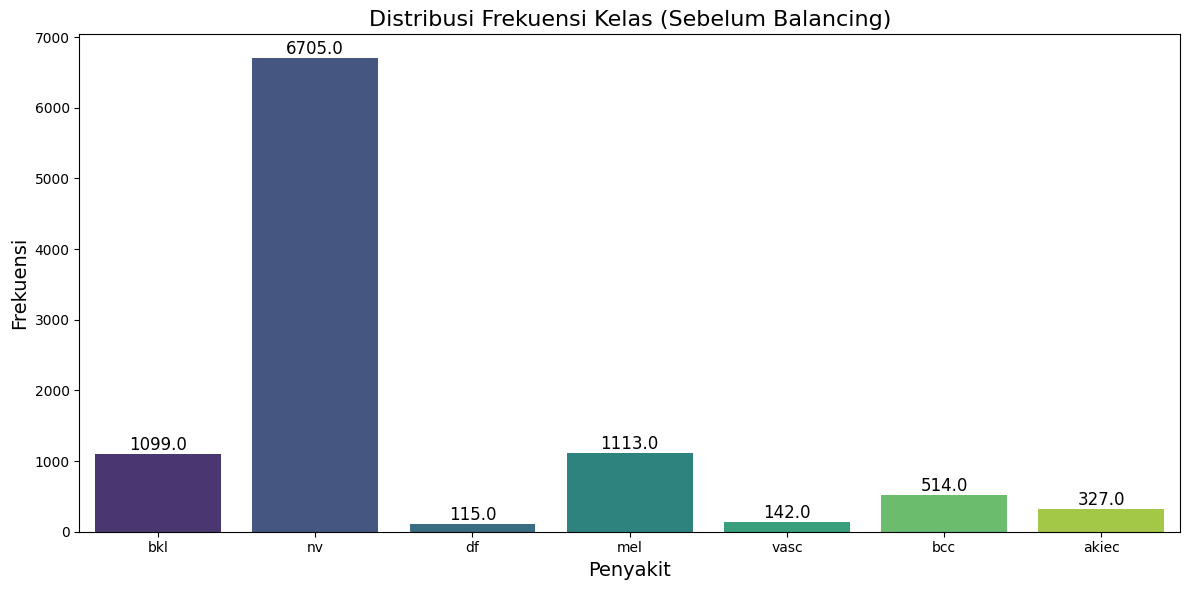


Pendekatan balancing data yang ditingkatkan...
Jumlah sampel kelas akiec setelah filtering: 327
Jumlah sampel kelas bcc setelah filtering: 514
Jumlah sampel kelas mel setelah filtering: 1113
Target sampel per kelas: 800
Balanced dataset shape: (2400, 8)

Distribusi Kelas Setelah Balancing:
Jumlah sampel kelas akiec setelah balancing: 800
Jumlah sampel kelas bcc setelah balancing: 800
Jumlah sampel kelas mel setelah balancing: 800


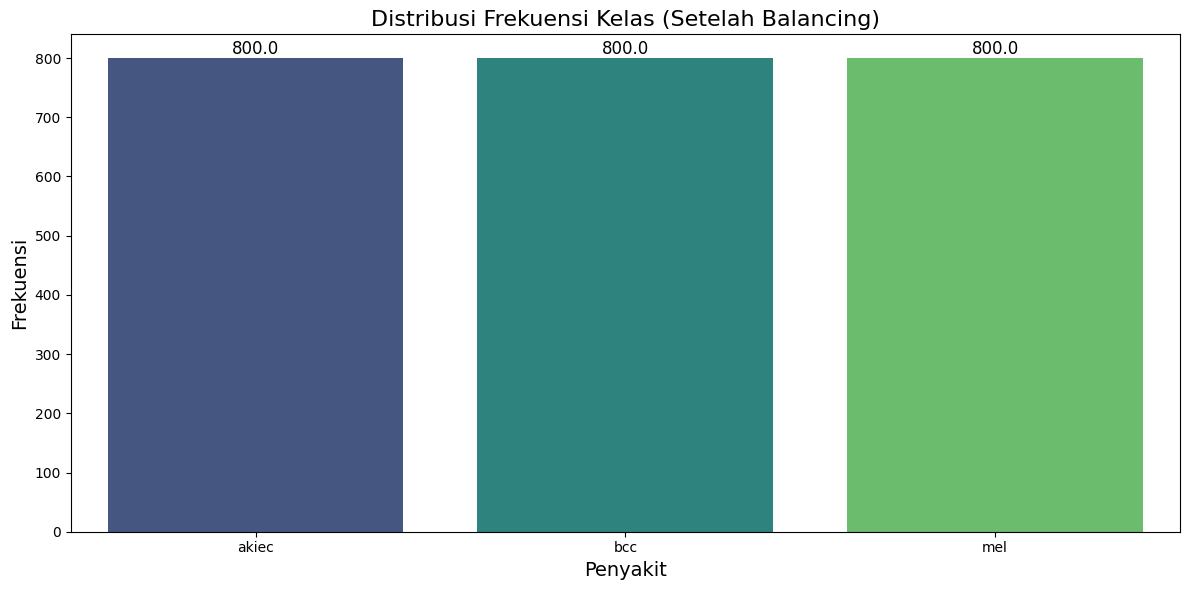

Train set size: 1920, Validation set size: 480

Distribusi Kelas Pada Train Set:
Jumlah sampel kelas akiec: 640
Jumlah sampel kelas bcc: 640
Jumlah sampel kelas mel: 640

Distribusi Kelas Pada Validation Set:
Jumlah sampel kelas akiec: 160
Jumlah sampel kelas bcc: 160
Jumlah sampel kelas mel: 160

Mengkonfigurasi data generators dengan augmentasi yang lebih agresif...
All image paths are strings: True
Found 1920 validated image filenames belonging to 3 classes.
Found 480 validated image filenames belonging to 3 classes.
Class indices: {'akiec': 0, 'bcc': 1, 'mel': 2}
Ukuran input dari train_generator: (224, 224, 3)
Jumlah kelas dari generator: 3
Found 1920 validated image filenames belonging to 3 classes.
Menampilkan contoh gambar yang diaugmentasi:


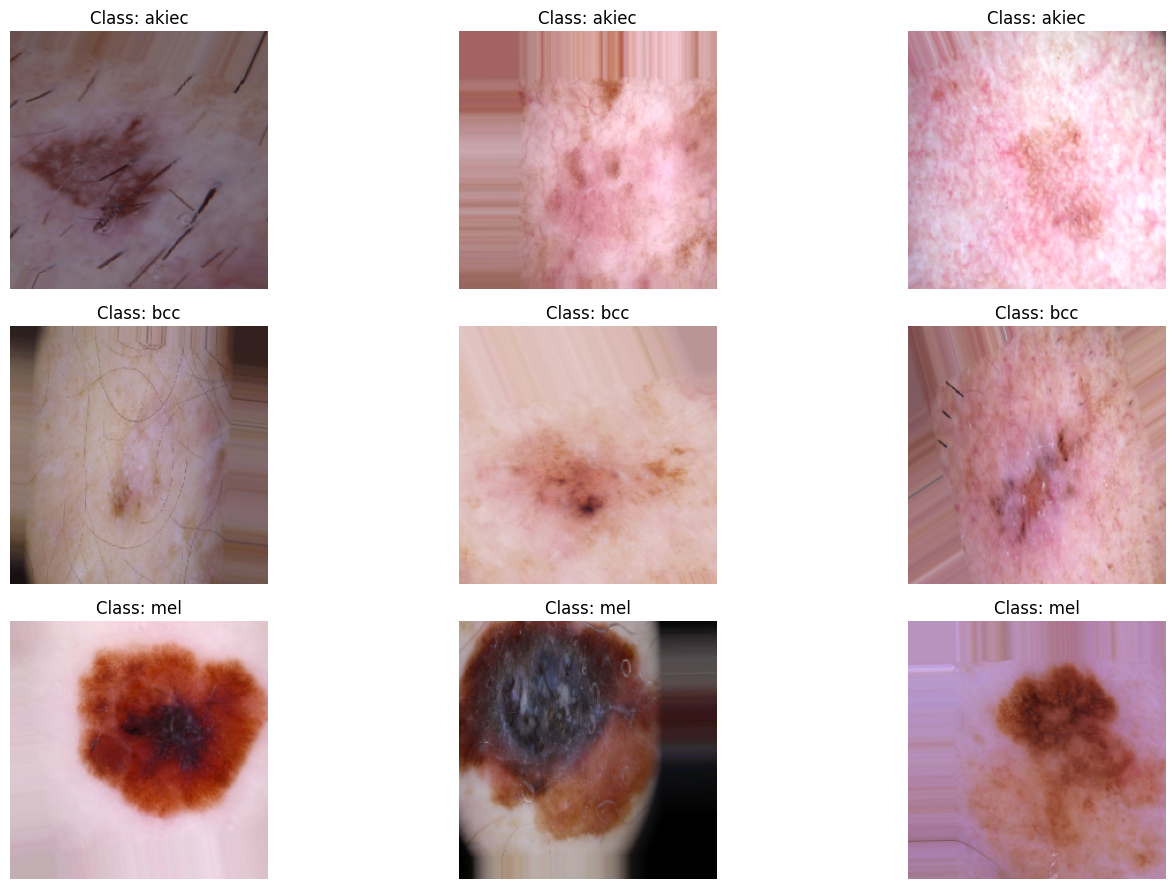

Menggunakan ukuran input: (224, 224, 3)

Membuat model VGG16 dengan CBAM dan Progressive Learning...
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "VGG16_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ vgg16 (Functional)        │ (None, 7, 7, 512)      │     14,714,688 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ cbam (CBAM)               │ (None, 7, 7, 512)      │         66,211 │ vgg16[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling2d_2    │ (None, 512)            │              0 │ cbam[0][0]             │
│ (GlobalMaxPooling2D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 512)            │              0 │ cbam[0][0]             │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_2             │ (None, 1024)           │              0 │ global_max_pooling2d_… │
│ (Concatenate)             │                        │                │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 1024)           │          4,096 │ concatenate_2[0][0]    │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 512)            │        524,800 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 512)            │          2,048 │ dense_2[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 512)            │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 256)            │        131,328 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 256)            │          1,024 │ dense_3[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 256)            │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 3)              │            771 │ dropout_1[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 15,444,966 (58.92 MB)

 Trainable params: 13,705,894 (52.28 MB)

 Non-trainable params: 1,739,072 (6.63 MB)


Training model VGG16...
Epoch 1/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step - accuracy: 0.3914 - loss: 2.3446
Epoch 1: val_accuracy improved from -inf to 0.33333, saving model to best_VGG16.h5


120/120 ━━━━━━━━━━━━━━━━━━━━ 78s 408ms/step - accuracy: 0.3916 - loss: 2.3439 - val_accuracy: 0.3333 - val_loss: 11.0318 - learning_rate: 1.0000e-04
Epoch 2/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step - accuracy: 0.4467 - loss: 2.0727
Epoch 2: val_accuracy did not improve from 0.33333
120/120 ━━━━━━━━━━━━━━━━━━━━ 51s 333ms/step - accuracy: 0.4466 - loss: 2.0731 - val_accuracy: 0.3333 - val_loss: 10.2942 - learning_rate: 1.0000e-04
Epoch 3/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step - accuracy: 0.4342 - loss: 2.0141
Epoch 3: val_accuracy did not improve from 0.33333
120/120 ━━━━━━━━━━━━━━━━━━━━ 40s 335ms/step - accuracy: 0.4341 - loss: 2.0144 - val_accuracy: 0.3333 - val_loss: 8.7130 - learning_rate: 1.0000e-04
Epoch 4/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step - accuracy: 0.4092 - loss: 2.0936
Epoch 4: val_accuracy did not improve from 0.33333
120/120 ━━━━━━━━━━━━━━━━━━━━ 40s 329ms/step - accuracy: 0.4096 - loss: 2.0929 - val_accuracy: 0.3333 - val_loss: 11.3324 - learning_ra

120/120 ━━━━━━━━━━━━━━━━━━━━ 42s 338ms/step - accuracy: 0.5345 - loss: 1.7463 - val_accuracy: 0.3688 - val_loss: 3.1381 - learning_rate: 1.0000e-04
Epoch 8/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - accuracy: 0.5101 - loss: 1.8001
Epoch 8: val_accuracy improved from 0.36875 to 0.38333, saving model to best_VGG16.h5


120/120 ━━━━━━━━━━━━━━━━━━━━ 42s 353ms/step - accuracy: 0.5100 - loss: 1.8003 - val_accuracy: 0.3833 - val_loss: 4.6496 - learning_rate: 1.0000e-04
Epoch 9/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - accuracy: 0.5105 - loss: 1.8007
Epoch 9: val_accuracy did not improve from 0.38333
120/120 ━━━━━━━━━━━━━━━━━━━━ 40s 331ms/step - accuracy: 0.5106 - loss: 1.8003 - val_accuracy: 0.3604 - val_loss: 6.3134 - learning_rate: 1.0000e-04
Epoch 10/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - accuracy: 0.5321 - loss: 1.7639
Epoch 10: val_accuracy improved from 0.38333 to 0.52917, saving model to best_VGG16.h5


120/120 ━━━━━━━━━━━━━━━━━━━━ 40s 337ms/step - accuracy: 0.5322 - loss: 1.7637 - val_accuracy: 0.5292 - val_loss: 2.0924 - learning_rate: 1.0000e-04
Epoch 11/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step - accuracy: 0.5456 - loss: 1.6229
Epoch 11: val_accuracy did not improve from 0.52917
120/120 ━━━━━━━━━━━━━━━━━━━━ 42s 350ms/step - accuracy: 0.5457 - loss: 1.6228 - val_accuracy: 0.4729 - val_loss: 2.6050 - learning_rate: 1.0000e-04
Epoch 12/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step - accuracy: 0.5699 - loss: 1.5339
Epoch 12: val_accuracy did not improve from 0.52917
120/120 ━━━━━━━━━━━━━━━━━━━━ 80s 331ms/step - accuracy: 0.5698 - loss: 1.5343 - val_accuracy: 0.3313 - val_loss: 3.7774 - learning_rate: 1.0000e-04
Epoch 13/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step - accuracy: 0.5176 - loss: 1.6892
Epoch 13: val_accuracy improved from 0.52917 to 0.53958, saving model to best_VGG16.h5


120/120 ━━━━━━━━━━━━━━━━━━━━ 42s 335ms/step - accuracy: 0.5175 - loss: 1.6891 - val_accuracy: 0.5396 - val_loss: 1.5495 - learning_rate: 1.0000e-04
Epoch 14/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - accuracy: 0.5141 - loss: 1.6871
Epoch 14: val_accuracy did not improve from 0.53958
120/120 ━━━━━━━━━━━━━━━━━━━━ 40s 332ms/step - accuracy: 0.5139 - loss: 1.6876 - val_accuracy: 0.4417 - val_loss: 4.7728 - learning_rate: 1.0000e-04
Epoch 15/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - accuracy: 0.4673 - loss: 1.7912
Epoch 15: val_accuracy did not improve from 0.53958
120/120 ━━━━━━━━━━━━━━━━━━━━ 41s 330ms/step - accuracy: 0.4673 - loss: 1.7912 - val_accuracy: 0.3354 - val_loss: 10.5880 - learning_rate: 1.0000e-04
Epoch 16/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step - accuracy: 0.4339 - loss: nan
Epoch 16: val_accuracy did not improve from 0.53958
120/120 ━━━━━━━━━━━━━━━━━━━━ 40s 335ms/step - accuracy: 0.4342 - loss: nan - val_accuracy: 0.3333 - val_loss: nan - learning_rate: 1

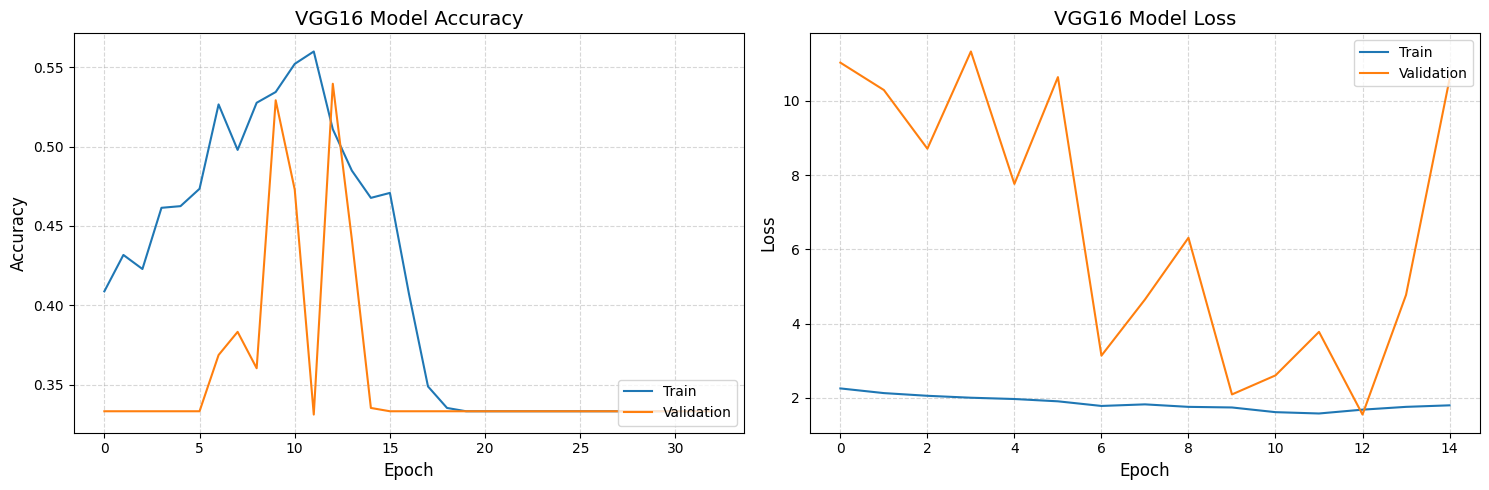


Evaluasi Model VGG16:
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step


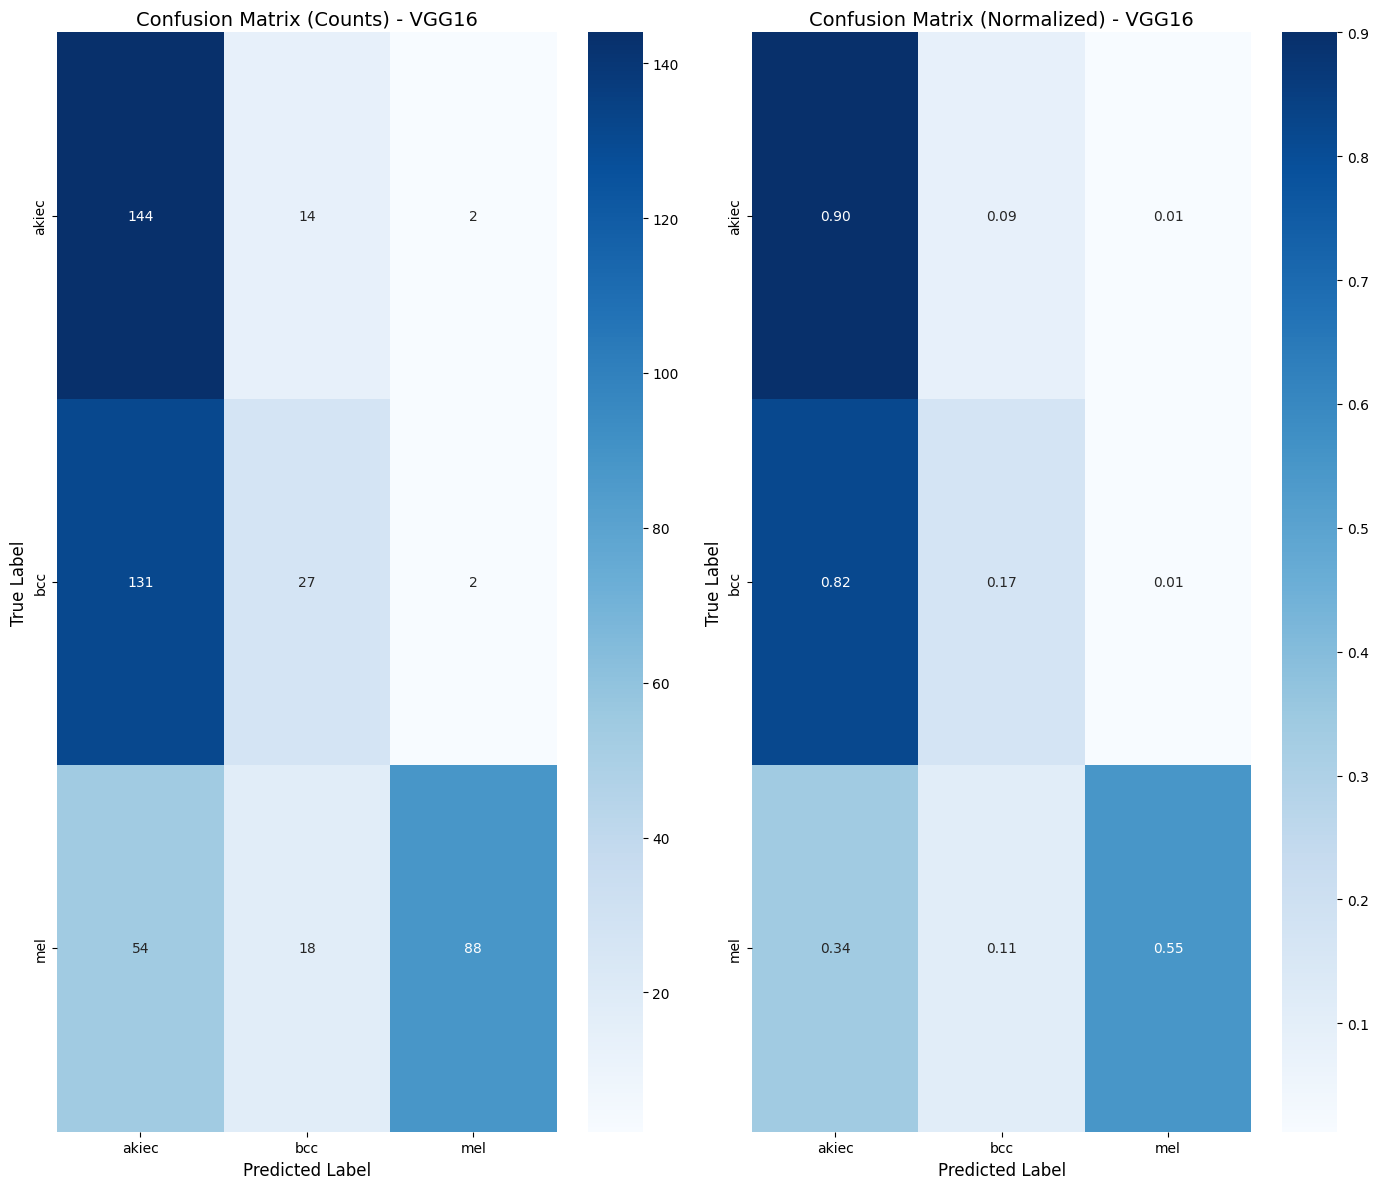


Classification Report - VGG16:
Accuracy: 0.5396

Per-Class Metrics:
Class akiec:
  Precision: 0.4377
  Recall: 0.9000
  F1-score: 0.5890
  Support: 160.0
Class bcc:
  Precision: 0.4576
  Recall: 0.1688
  F1-score: 0.2466
  Support: 160.0
Class mel:
  Precision: 0.9565
  Recall: 0.5500
  F1-score: 0.6984
  Support: 160.0

Average Metrics:
  Macro Avg Precision: 0.6173
  Macro Avg Recall: 0.5396
  Macro Avg F1-score: 0.5113
  Weighted Avg Precision: 0.6173
  Weighted Avg Recall: 0.5396
  Weighted Avg F1-score: 0.5113


<Figure size 1400x800 with 0 Axes>

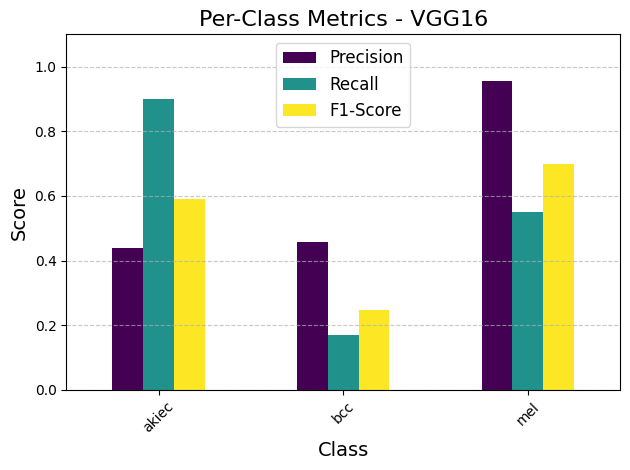


Membuat model MobileNetV2 dengan CBAM...
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "MobileNetV2_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ mobilenetv2_1.00_224      │ (None, 7, 7, 1280)     │      2,257,984 │ input_layer_3[0][0]    │
│ (Functional)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ cbam_1 (CBAM)             │ (None, 7, 7, 1280)     │        411,139 │ mobilenetv2_1.00_224[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling2d_9    │ (None, 1280)           │              0 │ cbam_1[0][0]           │
│ (GlobalMaxPooling2D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 1280)           │              0 │ cbam_1[0][0]           │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_9             │ (None, 2560)           │              0 │ global_max_pooling2d_… │
│ (Concatenate)             │                        │                │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 2560)           │         10,240 │ concatenate_9[0][0]    │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 512)            │      1,311,232 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 512)            │          2,048 │ dense_7[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 512)            │              0 │ batch_normalization_4… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_8 (Dense)           │ (None, 256)            │        131,328 │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_5     │ (None, 256)            │          1,024 │ dense_8[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 256)            │              0 │ batch_normalization_5… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_9 (Dense)           │ (None, 3)              │            771 │ dropout_3[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 4,125,766 (15.74 MB)

 Trainable params: 3,067,206 (11.70 MB)

 Non-trainable params: 1,058,560 (4.04 MB)


Training model MobileNetV2...
Epoch 1/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.3866 - loss: 2.6170
Epoch 1: val_accuracy improved from -inf to 0.50625, saving model to best_MobileNetV2.h5


120/120 ━━━━━━━━━━━━━━━━━━━━ 68s 351ms/step - accuracy: 0.3869 - loss: 2.6158 - val_accuracy: 0.5063 - val_loss: 1.9763 - learning_rate: 1.0000e-04
Epoch 2/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - accuracy: 0.5177 - loss: 2.2068
Epoch 2: val_accuracy improved from 0.50625 to 0.54583, saving model to best_MobileNetV2.h5


120/120 ━━━━━━━━━━━━━━━━━━━━ 63s 320ms/step - accuracy: 0.5178 - loss: 2.2067 - val_accuracy: 0.5458 - val_loss: 1.8321 - learning_rate: 1.0000e-04
Epoch 3/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - accuracy: 0.5246 - loss: 2.1449
Epoch 3: val_accuracy improved from 0.54583 to 0.61042, saving model to best_MobileNetV2.h5


120/120 ━━━━━━━━━━━━━━━━━━━━ 41s 339ms/step - accuracy: 0.5249 - loss: 2.1443 - val_accuracy: 0.6104 - val_loss: 1.8909 - learning_rate: 1.0000e-04
Epoch 4/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - accuracy: 0.5665 - loss: 2.0402
Epoch 4: val_accuracy did not improve from 0.61042
120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 313ms/step - accuracy: 0.5666 - loss: 2.0399 - val_accuracy: 0.6104 - val_loss: 1.9916 - learning_rate: 1.0000e-04
Epoch 5/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step - accuracy: 0.6086 - loss: 1.9254
Epoch 5: val_accuracy improved from 0.61042 to 0.63333, saving model to best_MobileNetV2.h5


120/120 ━━━━━━━━━━━━━━━━━━━━ 41s 317ms/step - accuracy: 0.6086 - loss: 1.9252 - val_accuracy: 0.6333 - val_loss: 1.9948 - learning_rate: 1.0000e-04
Epoch 6/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - accuracy: 0.6313 - loss: 1.9048
Epoch 6: val_accuracy did not improve from 0.63333
120/120 ━━━━━━━━━━━━━━━━━━━━ 43s 334ms/step - accuracy: 0.6314 - loss: 1.9041 - val_accuracy: 0.6229 - val_loss: 2.1208 - learning_rate: 1.0000e-04
Epoch 7/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 0.6539 - loss: 1.8377
Epoch 7: val_accuracy improved from 0.63333 to 0.64583, saving model to best_MobileNetV2.h5


120/120 ━━━━━━━━━━━━━━━━━━━━ 39s 318ms/step - accuracy: 0.6539 - loss: 1.8374 - val_accuracy: 0.6458 - val_loss: 2.2297 - learning_rate: 1.0000e-04
Epoch 8/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step - accuracy: 0.6671 - loss: 1.7503
Epoch 8: val_accuracy did not improve from 0.64583
120/120 ━━━━━━━━━━━━━━━━━━━━ 40s 312ms/step - accuracy: 0.6671 - loss: 1.7503 - val_accuracy: 0.5833 - val_loss: 2.4262 - learning_rate: 1.0000e-04
Epoch 9/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - accuracy: 0.6523 - loss: 1.7571
Epoch 9: val_accuracy improved from 0.64583 to 0.66667, saving model to best_MobileNetV2.h5


120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 316ms/step - accuracy: 0.6525 - loss: 1.7570 - val_accuracy: 0.6667 - val_loss: 1.9691 - learning_rate: 1.0000e-04
Epoch 10/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step - accuracy: 0.6954 - loss: 1.6620
Epoch 10: val_accuracy did not improve from 0.66667
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 312ms/step - accuracy: 0.6953 - loss: 1.6623 - val_accuracy: 0.6438 - val_loss: 2.0206 - learning_rate: 1.0000e-04
Epoch 11/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 0.7236 - loss: 1.6024
Epoch 11: val_accuracy improved from 0.66667 to 0.70625, saving model to best_MobileNetV2.h5


120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 317ms/step - accuracy: 0.7235 - loss: 1.6027 - val_accuracy: 0.7063 - val_loss: 1.7044 - learning_rate: 1.0000e-04
Epoch 12/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step - accuracy: 0.7177 - loss: 1.6343
Epoch 12: val_accuracy did not improve from 0.70625
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 312ms/step - accuracy: 0.7177 - loss: 1.6343 - val_accuracy: 0.7042 - val_loss: 1.7252 - learning_rate: 1.0000e-04
Epoch 13/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - accuracy: 0.7199 - loss: 1.5561
Epoch 13: val_accuracy improved from 0.70625 to 0.74583, saving model to best_MobileNetV2.h5


120/120 ━━━━━━━━━━━━━━━━━━━━ 42s 317ms/step - accuracy: 0.7199 - loss: 1.5566 - val_accuracy: 0.7458 - val_loss: 1.5206 - learning_rate: 1.0000e-04
Epoch 14/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - accuracy: 0.7426 - loss: 1.5391
Epoch 14: val_accuracy improved from 0.74583 to 0.77083, saving model to best_MobileNetV2.h5


120/120 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - accuracy: 0.7424 - loss: 1.5393 - val_accuracy: 0.7708 - val_loss: 1.4301 - learning_rate: 1.0000e-04
Epoch 15/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - accuracy: 0.7296 - loss: 1.5526
Epoch 15: val_accuracy did not improve from 0.77083
120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 315ms/step - accuracy: 0.7296 - loss: 1.5526 - val_accuracy: 0.7583 - val_loss: 1.4164 - learning_rate: 1.0000e-04
Epoch 16/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step - accuracy: 0.7322 - loss: 1.5185
Epoch 16: val_accuracy did not improve from 0.77083
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 312ms/step - accuracy: 0.7322 - loss: 1.5187 - val_accuracy: 0.7437 - val_loss: 1.5839 - learning_rate: 1.0000e-04
Epoch 17/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 0.7496 - loss: 1.5190
Epoch 17: val_accuracy did not improve from 0.77083
120/120 ━━━━━━━━━━━━━━━━━━━━ 41s 312ms/step - accuracy: 0.7496 - loss: 1.5190 - val_accuracy: 0.7458 - val_loss: 1.5913 - learning

120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 318ms/step - accuracy: 0.7977 - loss: 1.3474 - val_accuracy: 0.7958 - val_loss: 1.3102 - learning_rate: 1.0000e-04
Epoch 25/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 0.7698 - loss: 1.4291
Epoch 25: val_accuracy did not improve from 0.79583
120/120 ━━━━━━━━━━━━━━━━━━━━ 40s 314ms/step - accuracy: 0.7700 - loss: 1.4286 - val_accuracy: 0.7417 - val_loss: 1.5952 - learning_rate: 1.0000e-04
Epoch 26/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 0.7885 - loss: 1.3691
Epoch 26: val_accuracy did not improve from 0.79583
120/120 ━━━━━━━━━━━━━━━━━━━━ 41s 313ms/step - accuracy: 0.7885 - loss: 1.3691 - val_accuracy: 0.7312 - val_loss: 1.5933 - learning_rate: 1.0000e-04
Epoch 27/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step - accuracy: 0.8130 - loss: 1.3315
Epoch 27: val_accuracy improved from 0.79583 to 0.81458, saving model to best_MobileNetV2.h5


120/120 ━━━━━━━━━━━━━━━━━━━━ 41s 316ms/step - accuracy: 0.8129 - loss: 1.3317 - val_accuracy: 0.8146 - val_loss: 1.3267 - learning_rate: 1.0000e-04
Epoch 28/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.8040 - loss: 1.3203
Epoch 28: val_accuracy did not improve from 0.81458
120/120 ━━━━━━━━━━━━━━━━━━━━ 40s 312ms/step - accuracy: 0.8039 - loss: 1.3205 - val_accuracy: 0.8146 - val_loss: 1.2675 - learning_rate: 1.0000e-04
Epoch 29/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 0.7850 - loss: 1.3613
Epoch 29: val_accuracy did not improve from 0.81458
120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 314ms/step - accuracy: 0.7852 - loss: 1.3609 - val_accuracy: 0.7792 - val_loss: 1.3798 - learning_rate: 1.0000e-04
Epoch 30/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 0.7989 - loss: 1.3207
Epoch 30: val_accuracy did not improve from 0.81458
120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 314ms/step - accuracy: 0.7989 - loss: 1.3205 - val_accuracy: 0.7646 - val_loss: 1.4523 - learning

120/120 ━━━━━━━━━━━━━━━━━━━━ 42s 319ms/step - accuracy: 0.8366 - loss: 1.2095 - val_accuracy: 0.8458 - val_loss: 1.1642 - learning_rate: 1.0000e-04
Epoch 38/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - accuracy: 0.8459 - loss: 1.1839
Epoch 38: val_accuracy did not improve from 0.84583
120/120 ━━━━━━━━━━━━━━━━━━━━ 41s 318ms/step - accuracy: 0.8459 - loss: 1.1840 - val_accuracy: 0.8146 - val_loss: 1.4688 - learning_rate: 1.0000e-04
Epoch 39/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 0.8359 - loss: 1.1796
Epoch 39: val_accuracy improved from 0.84583 to 0.86458, saving model to best_MobileNetV2.h5


120/120 ━━━━━━━━━━━━━━━━━━━━ 39s 321ms/step - accuracy: 0.8360 - loss: 1.1795 - val_accuracy: 0.8646 - val_loss: 1.1258 - learning_rate: 1.0000e-04
Epoch 40/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - accuracy: 0.8390 - loss: 1.2295
Epoch 40: val_accuracy did not improve from 0.86458
120/120 ━━━━━━━━━━━━━━━━━━━━ 40s 316ms/step - accuracy: 0.8390 - loss: 1.2291 - val_accuracy: 0.8500 - val_loss: 1.1724 - learning_rate: 1.0000e-04
Epoch 41/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - accuracy: 0.8522 - loss: 1.1117
Epoch 41: val_accuracy did not improve from 0.86458
120/120 ━━━━━━━━━━━━━━━━━━━━ 43s 334ms/step - accuracy: 0.8521 - loss: 1.1121 - val_accuracy: 0.8604 - val_loss: 1.1195 - learning_rate: 1.0000e-04
Epoch 42/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step - accuracy: 0.8553 - loss: 1.1757
Epoch 42: val_accuracy did not improve from 0.86458
120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 315ms/step - accuracy: 0.8553 - loss: 1.1755 - val_accuracy: 0.8333 - val_loss: 1.1893 - learning

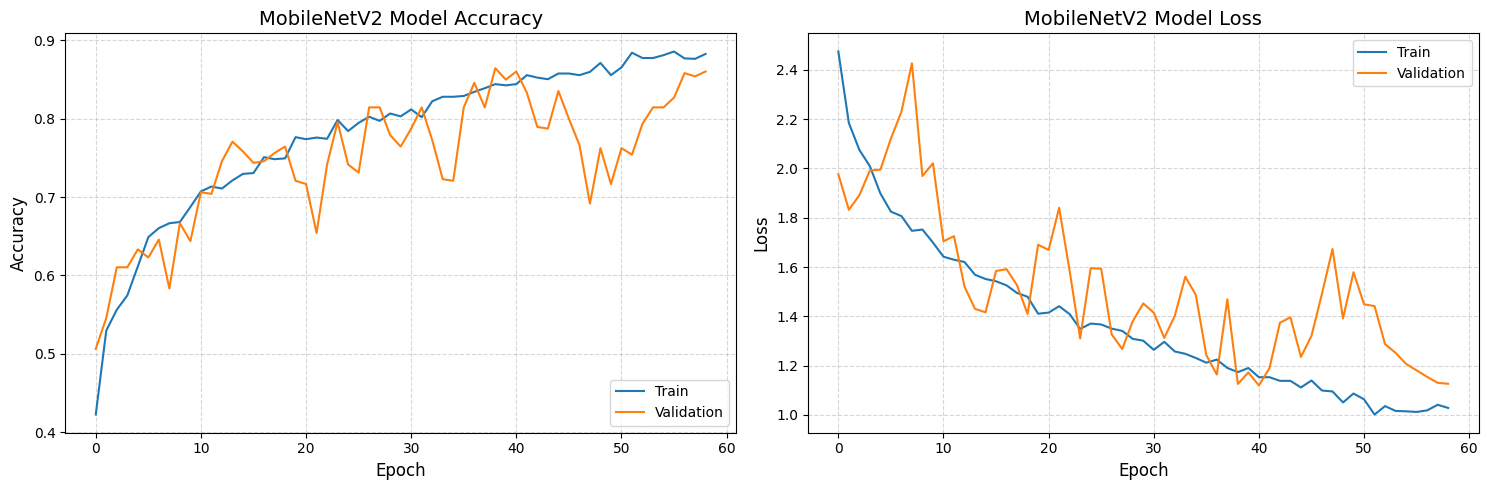


Evaluasi Model MobileNetV2:
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step


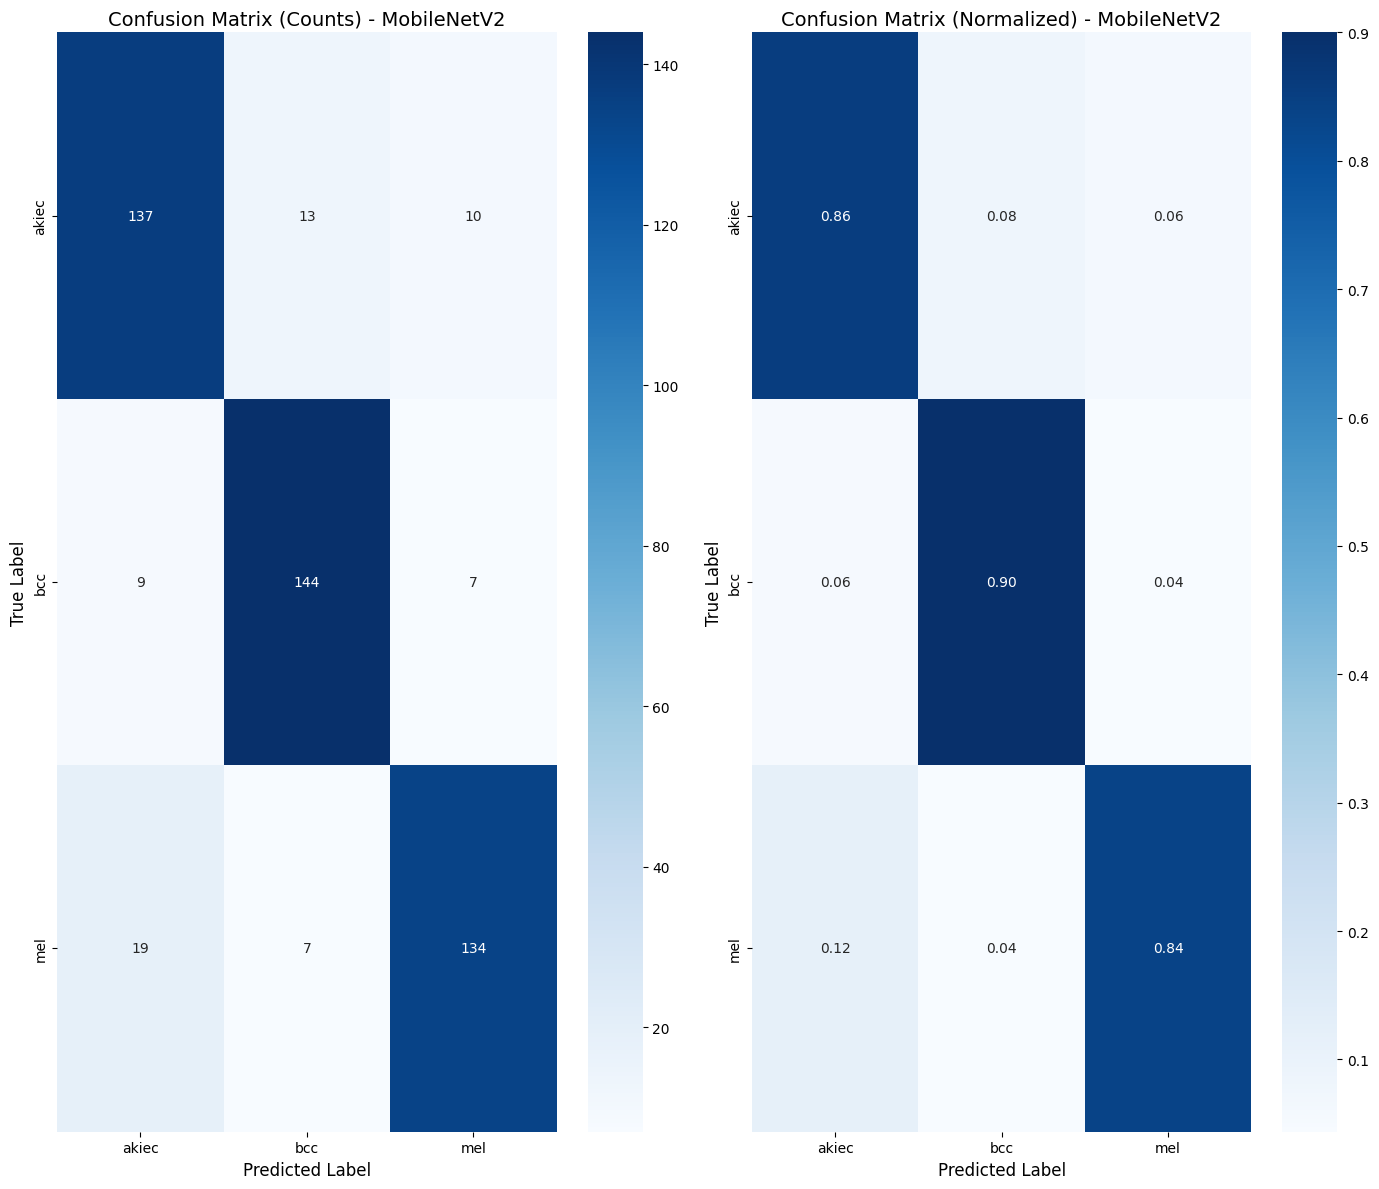


Classification Report - MobileNetV2:
Accuracy: 0.8646

Per-Class Metrics:
Class akiec:
  Precision: 0.8303
  Recall: 0.8562
  F1-score: 0.8431
  Support: 160.0
Class bcc:
  Precision: 0.8780
  Recall: 0.9000
  F1-score: 0.8889
  Support: 160.0
Class mel:
  Precision: 0.8874
  Recall: 0.8375
  F1-score: 0.8617
  Support: 160.0

Average Metrics:
  Macro Avg Precision: 0.8653
  Macro Avg Recall: 0.8646
  Macro Avg F1-score: 0.8646
  Weighted Avg Precision: 0.8653
  Weighted Avg Recall: 0.8646
  Weighted Avg F1-score: 0.8646


<Figure size 1400x800 with 0 Axes>

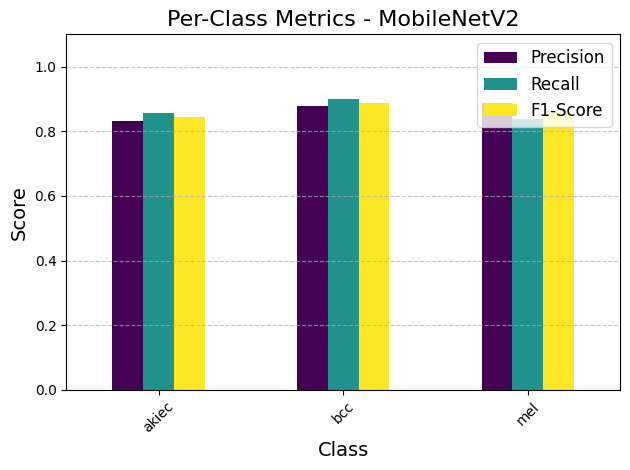


Membuat Optimized Combined Model dengan attention mechanism...


Model: "Combined_VGG16_MobileNetV2_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ combined_input            │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ vgg16 (Functional)        │ (None, 7, 7, 512)      │     14,714,688 │ combined_input[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ mobilenetv2_1.00_224      │ (None, 7, 7, 1280)     │      2,257,984 │ combined_input[0][0]   │
│ (Functional)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ cbam_2 (CBAM)             │ (None, 7, 7, 512)      │         66,211 │ vgg16[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ cbam_3 (CBAM)             │ (None, 7, 7, 1280)     │        411,139 │ mobilenetv2_1.00_224[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling2d_18   │ (None, 512)            │              0 │ cbam_2[0][0]           │
│ (GlobalMaxPooling2D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 512)            │              0 │ cbam_2[0][0]           │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling2d_19   │ (None, 1280)           │              0 │ cbam_3[0][0]           │
│ (GlobalMaxPooling2D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 1280)           │              0 │ cbam_3[0][0]           │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_18            │ (None, 1024)           │              0 │ global_max_pooling2d_… │
│ (Concatenate)             │                        │                │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_19            │ (None, 2560)           │              0 │ global_max_pooling2d_… │
│ (Concatenate)             │                        │                │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_6     │ (None, 1024)           │          4,096 │ concatenate_18[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_7     │ (None, 2560)           │         10,240 │ concatenate_19[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_14 (Dense)          │ (None, 128)            │        131,200 │ batch_normalization_6… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_15 (Dense)     

 Total params: 19,941,675 (76.07 MB)

 Trainable params: 18,769,323 (71.60 MB)

 Non-trainable params: 1,172,352 (4.47 MB)


Training Combined Model...
Epoch 1/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.3458 - loss: 2.5726
Epoch 1: val_accuracy improved from -inf to 0.34583, saving model to best_Combined.h5


120/120 ━━━━━━━━━━━━━━━━━━━━ 105s 415ms/step - accuracy: 0.3459 - loss: 2.5718 - val_accuracy: 0.3458 - val_loss: 2.2519 - learning_rate: 5.0000e-05
Epoch 2/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - accuracy: 0.3982 - loss: 2.3449
Epoch 2: val_accuracy did not improve from 0.34583
120/120 ━━━━━━━━━━━━━━━━━━━━ 42s 352ms/step - accuracy: 0.3982 - loss: 2.3446 - val_accuracy: 0.3333 - val_loss: 4.8022 - learning_rate: 5.0000e-05
Epoch 3/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.4451 - loss: 2.2035
Epoch 3: val_accuracy improved from 0.34583 to 0.36250, saving model to best_Combined.h5


120/120 ━━━━━━━━━━━━━━━━━━━━ 87s 397ms/step - accuracy: 0.4451 - loss: 2.2035 - val_accuracy: 0.3625 - val_loss: 1.9984 - learning_rate: 5.0000e-05
Epoch 4/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.4681 - loss: 2.1229
Epoch 4: val_accuracy improved from 0.36250 to 0.50833, saving model to best_Combined.h5


120/120 ━━━━━━━━━━━━━━━━━━━━ 82s 401ms/step - accuracy: 0.4683 - loss: 2.1226 - val_accuracy: 0.5083 - val_loss: 2.0664 - learning_rate: 5.0000e-05
Epoch 5/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.5149 - loss: 2.0106
Epoch 5: val_accuracy did not improve from 0.50833
120/120 ━━━━━━━━━━━━━━━━━━━━ 76s 349ms/step - accuracy: 0.5150 - loss: 2.0103 - val_accuracy: 0.3458 - val_loss: 4.0288 - learning_rate: 5.0000e-05
Epoch 6/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - accuracy: 0.5375 - loss: 1.9485
Epoch 6: val_accuracy improved from 0.50833 to 0.61250, saving model to best_Combined.h5


120/120 ━━━━━━━━━━━━━━━━━━━━ 89s 408ms/step - accuracy: 0.5376 - loss: 1.9484 - val_accuracy: 0.6125 - val_loss: 1.8111 - learning_rate: 5.0000e-05
Epoch 7/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.5695 - loss: 1.8690
Epoch 7: val_accuracy did not improve from 0.61250
120/120 ━━━━━━━━━━━━━━━━━━━━ 76s 360ms/step - accuracy: 0.5696 - loss: 1.8689 - val_accuracy: 0.5271 - val_loss: 1.9758 - learning_rate: 5.0000e-05
Epoch 8/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - accuracy: 0.5697 - loss: 1.8567
Epoch 8: val_accuracy improved from 0.61250 to 0.67500, saving model to best_Combined.h5


120/120 ━━━━━━━━━━━━━━━━━━━━ 86s 398ms/step - accuracy: 0.5698 - loss: 1.8568 - val_accuracy: 0.6750 - val_loss: 1.6689 - learning_rate: 5.0000e-05
Epoch 9/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.5928 - loss: 1.8069
Epoch 9: val_accuracy did not improve from 0.67500
120/120 ━━━━━━━━━━━━━━━━━━━━ 76s 349ms/step - accuracy: 0.5928 - loss: 1.8070 - val_accuracy: 0.6333 - val_loss: 1.8020 - learning_rate: 5.0000e-05
Epoch 10/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - accuracy: 0.6073 - loss: 1.8148
Epoch 10: val_accuracy did not improve from 0.67500
120/120 ━━━━━━━━━━━━━━━━━━━━ 82s 351ms/step - accuracy: 0.6073 - loss: 1.8147 - val_accuracy: 0.6354 - val_loss: 1.6716 - learning_rate: 5.0000e-05
Epoch 11/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.6279 - loss: 1.7381
Epoch 11: val_accuracy did not improve from 0.67500
120/120 ━━━━━━━━━━━━━━━━━━━━ 41s 344ms/step - accuracy: 0.6280 - loss: 1.7378 - val_accuracy: 0.3604 - val_loss: 2.7240 - learning_r

120/120 ━━━━━━━━━━━━━━━━━━━━ 47s 393ms/step - accuracy: 0.6071 - loss: 1.7611 - val_accuracy: 0.6938 - val_loss: 1.6093 - learning_rate: 5.0000e-05
Epoch 13/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.6224 - loss: 1.7247
Epoch 13: val_accuracy did not improve from 0.69375
120/120 ━━━━━━━━━━━━━━━━━━━━ 76s 344ms/step - accuracy: 0.6224 - loss: 1.7249 - val_accuracy: 0.5375 - val_loss: 2.2225 - learning_rate: 5.0000e-05
Epoch 14/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step - accuracy: 0.6664 - loss: 1.6792
Epoch 14: val_accuracy did not improve from 0.69375
120/120 ━━━━━━━━━━━━━━━━━━━━ 42s 353ms/step - accuracy: 0.6664 - loss: 1.6793 - val_accuracy: 0.4771 - val_loss: 2.9291 - learning_rate: 5.0000e-05
Epoch 15/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.6371 - loss: 1.6687
Epoch 15: val_accuracy improved from 0.69375 to 0.70000, saving model to best_Combined.h5


120/120 ━━━━━━━━━━━━━━━━━━━━ 48s 398ms/step - accuracy: 0.6371 - loss: 1.6688 - val_accuracy: 0.7000 - val_loss: 1.6484 - learning_rate: 5.0000e-05
Epoch 16/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.6491 - loss: 1.6835
Epoch 16: val_accuracy did not improve from 0.70000
120/120 ━━━━━━━━━━━━━━━━━━━━ 41s 344ms/step - accuracy: 0.6491 - loss: 1.6834 - val_accuracy: 0.5688 - val_loss: 2.2089 - learning_rate: 5.0000e-05
Epoch 17/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.6853 - loss: 1.5482
Epoch 17: val_accuracy improved from 0.70000 to 0.72500, saving model to best_Combined.h5


120/120 ━━━━━━━━━━━━━━━━━━━━ 49s 407ms/step - accuracy: 0.6853 - loss: 1.5484 - val_accuracy: 0.7250 - val_loss: 1.5850 - learning_rate: 5.0000e-05
Epoch 18/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - accuracy: 0.6604 - loss: 1.6087
Epoch 18: val_accuracy did not improve from 0.72500
120/120 ━━━━━━━━━━━━━━━━━━━━ 42s 352ms/step - accuracy: 0.6605 - loss: 1.6086 - val_accuracy: 0.6187 - val_loss: 1.8470 - learning_rate: 5.0000e-05
Epoch 19/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.6537 - loss: 1.6399
Epoch 19: val_accuracy did not improve from 0.72500
120/120 ━━━━━━━━━━━━━━━━━━━━ 41s 344ms/step - accuracy: 0.6538 - loss: 1.6397 - val_accuracy: 0.6646 - val_loss: 1.7287 - learning_rate: 5.0000e-05
Epoch 20/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - accuracy: 0.6619 - loss: 1.6348
Epoch 20: val_accuracy did not improve from 0.72500
120/120 ━━━━━━━━━━━━━━━━━━━━ 42s 351ms/step - accuracy: 0.6620 - loss: 1.6344 - val_accuracy: 0.7021 - val_loss: 1.6706 - learning

120/120 ━━━━━━━━━━━━━━━━━━━━ 47s 394ms/step - accuracy: 0.6843 - loss: 1.5696 - val_accuracy: 0.7333 - val_loss: 1.4995 - learning_rate: 5.0000e-05
Epoch 24/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.6800 - loss: 1.5572
Epoch 24: val_accuracy did not improve from 0.73333
120/120 ━━━━━━━━━━━━━━━━━━━━ 41s 343ms/step - accuracy: 0.6803 - loss: 1.5568 - val_accuracy: 0.7083 - val_loss: 1.5068 - learning_rate: 5.0000e-05
Epoch 25/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - accuracy: 0.6872 - loss: 1.6046
Epoch 25: val_accuracy improved from 0.73333 to 0.77292, saving model to best_Combined.h5


120/120 ━━━━━━━━━━━━━━━━━━━━ 50s 421ms/step - accuracy: 0.6874 - loss: 1.6038 - val_accuracy: 0.7729 - val_loss: 1.3890 - learning_rate: 5.0000e-05
Epoch 26/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - accuracy: 0.7164 - loss: 1.4765
Epoch 26: val_accuracy did not improve from 0.77292
120/120 ━━━━━━━━━━━━━━━━━━━━ 42s 352ms/step - accuracy: 0.7165 - loss: 1.4764 - val_accuracy: 0.5125 - val_loss: 2.2469 - learning_rate: 5.0000e-05
Epoch 27/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.7233 - loss: 1.4237
Epoch 27: val_accuracy did not improve from 0.77292
120/120 ━━━━━━━━━━━━━━━━━━━━ 82s 350ms/step - accuracy: 0.7233 - loss: 1.4239 - val_accuracy: 0.4021 - val_loss: 3.5011 - learning_rate: 5.0000e-05
Epoch 28/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.6921 - loss: 1.4865
Epoch 28: val_accuracy did not improve from 0.77292
120/120 ━━━━━━━━━━━━━━━━━━━━ 41s 344ms/step - accuracy: 0.6922 - loss: 1.4864 - val_accuracy: 0.3333 - val_loss: 11.5132 - learnin

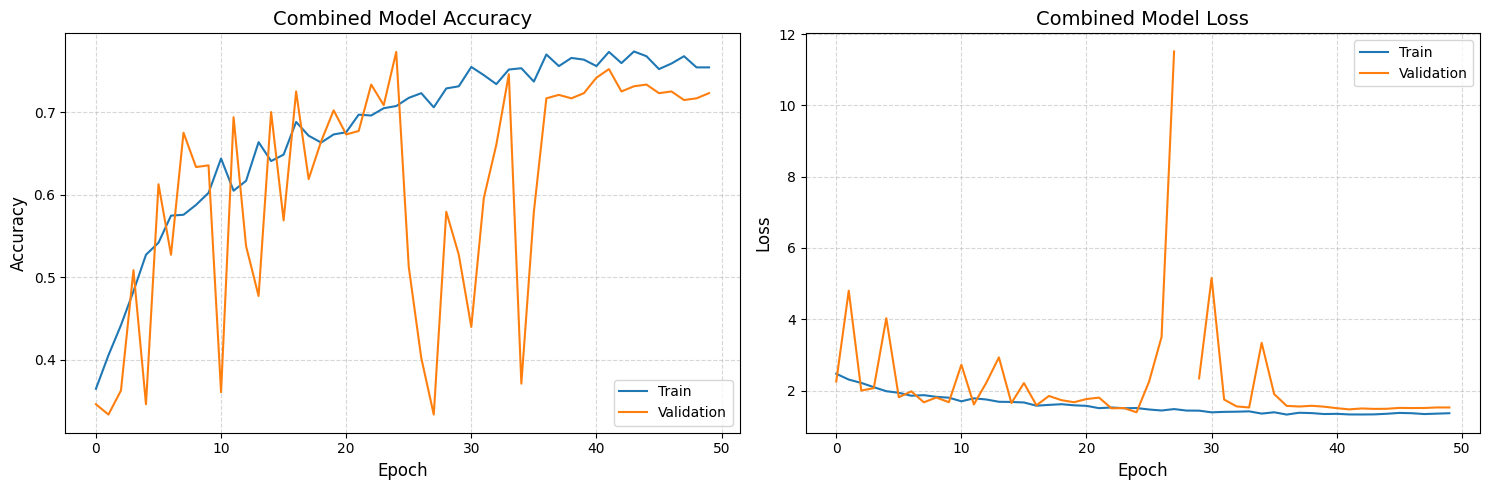


Evaluasi Model Combined VGG16-MobileNetV2:
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 119ms/step


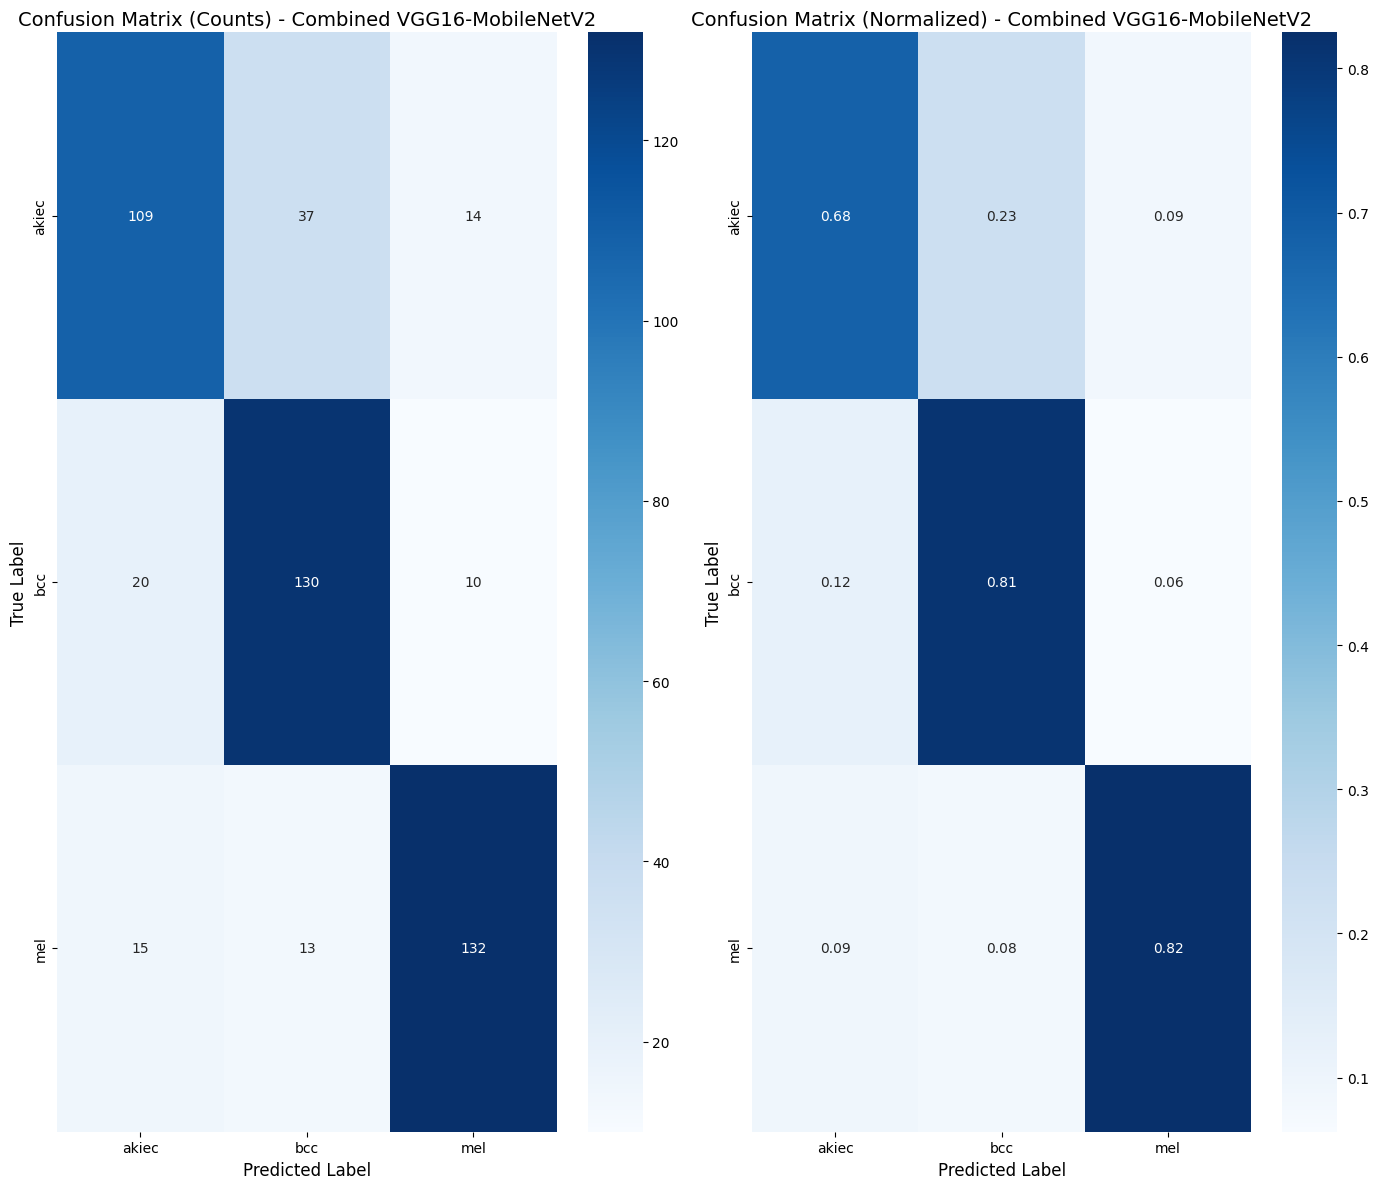


Classification Report - Combined VGG16-MobileNetV2:
Accuracy: 0.7729

Per-Class Metrics:
Class akiec:
  Precision: 0.7569
  Recall: 0.6813
  F1-score: 0.7171
  Support: 160.0
Class bcc:
  Precision: 0.7222
  Recall: 0.8125
  F1-score: 0.7647
  Support: 160.0
Class mel:
  Precision: 0.8462
  Recall: 0.8250
  F1-score: 0.8354
  Support: 160.0

Average Metrics:
  Macro Avg Precision: 0.7751
  Macro Avg Recall: 0.7729
  Macro Avg F1-score: 0.7724
  Weighted Avg Precision: 0.7751
  Weighted Avg Recall: 0.7729
  Weighted Avg F1-score: 0.7724


<Figure size 1400x800 with 0 Axes>

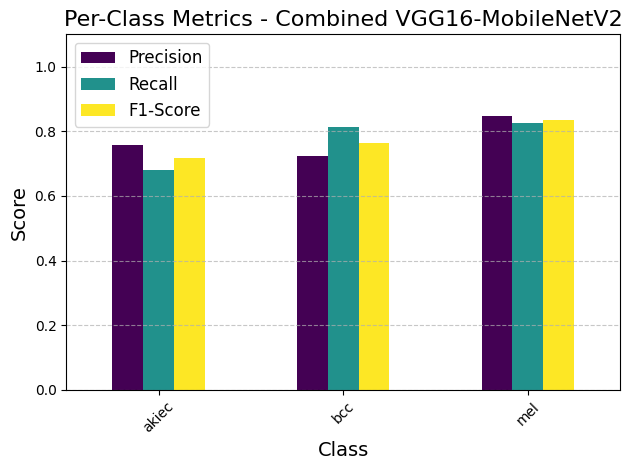


----- PERBANDINGAN MODEL -----


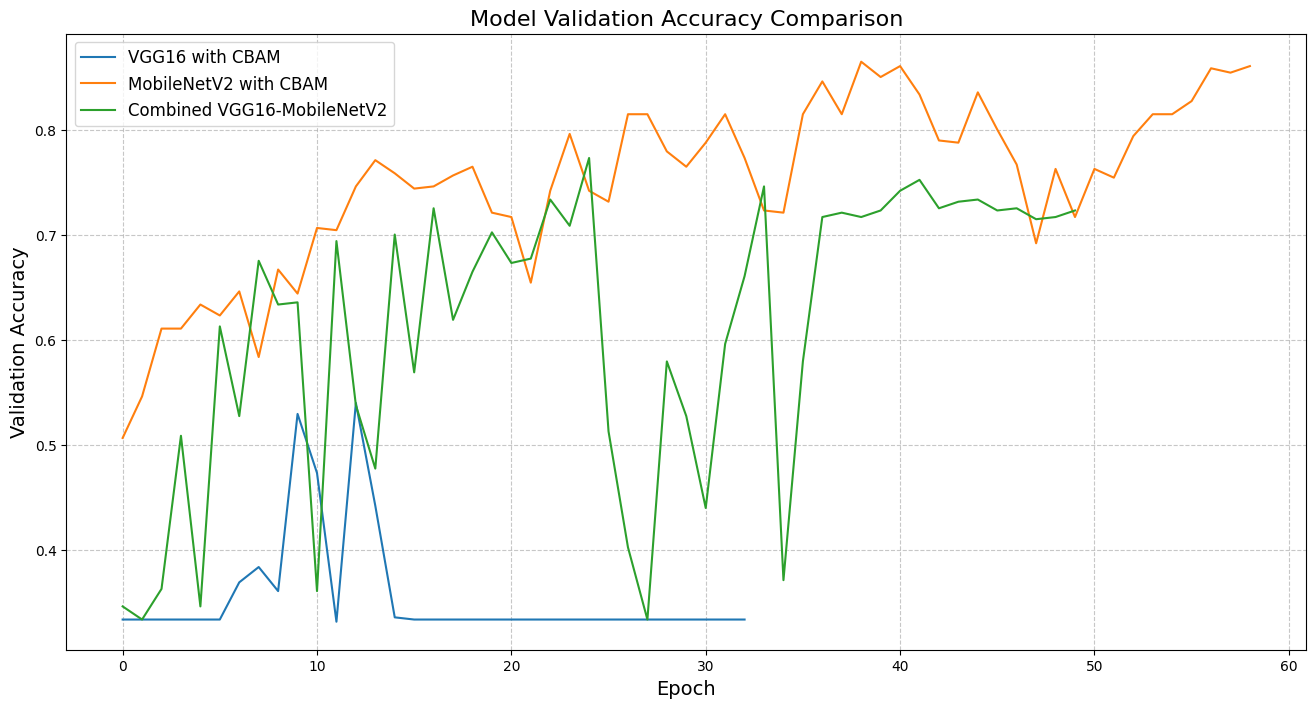


Perbandingan Akurasi Validasi Terbaik:
VGG16 with CBAM: 0.5396
MobileNetV2 with CBAM: 0.8646
Combined VGG16-MobileNetV2: 0.7729

Perbandingan Waktu Pelatihan (detik):
VGG16 with CBAM: 1428.55
MobileNetV2 with CBAM: 2387.43
Combined VGG16-MobileNetV2: 3105.09

Perbandingan Waktu Pelatihan per Epoch (detik):
VGG16 with CBAM: 43.29
MobileNetV2 with CBAM: 40.46
Combined VGG16-MobileNetV2: 62.10


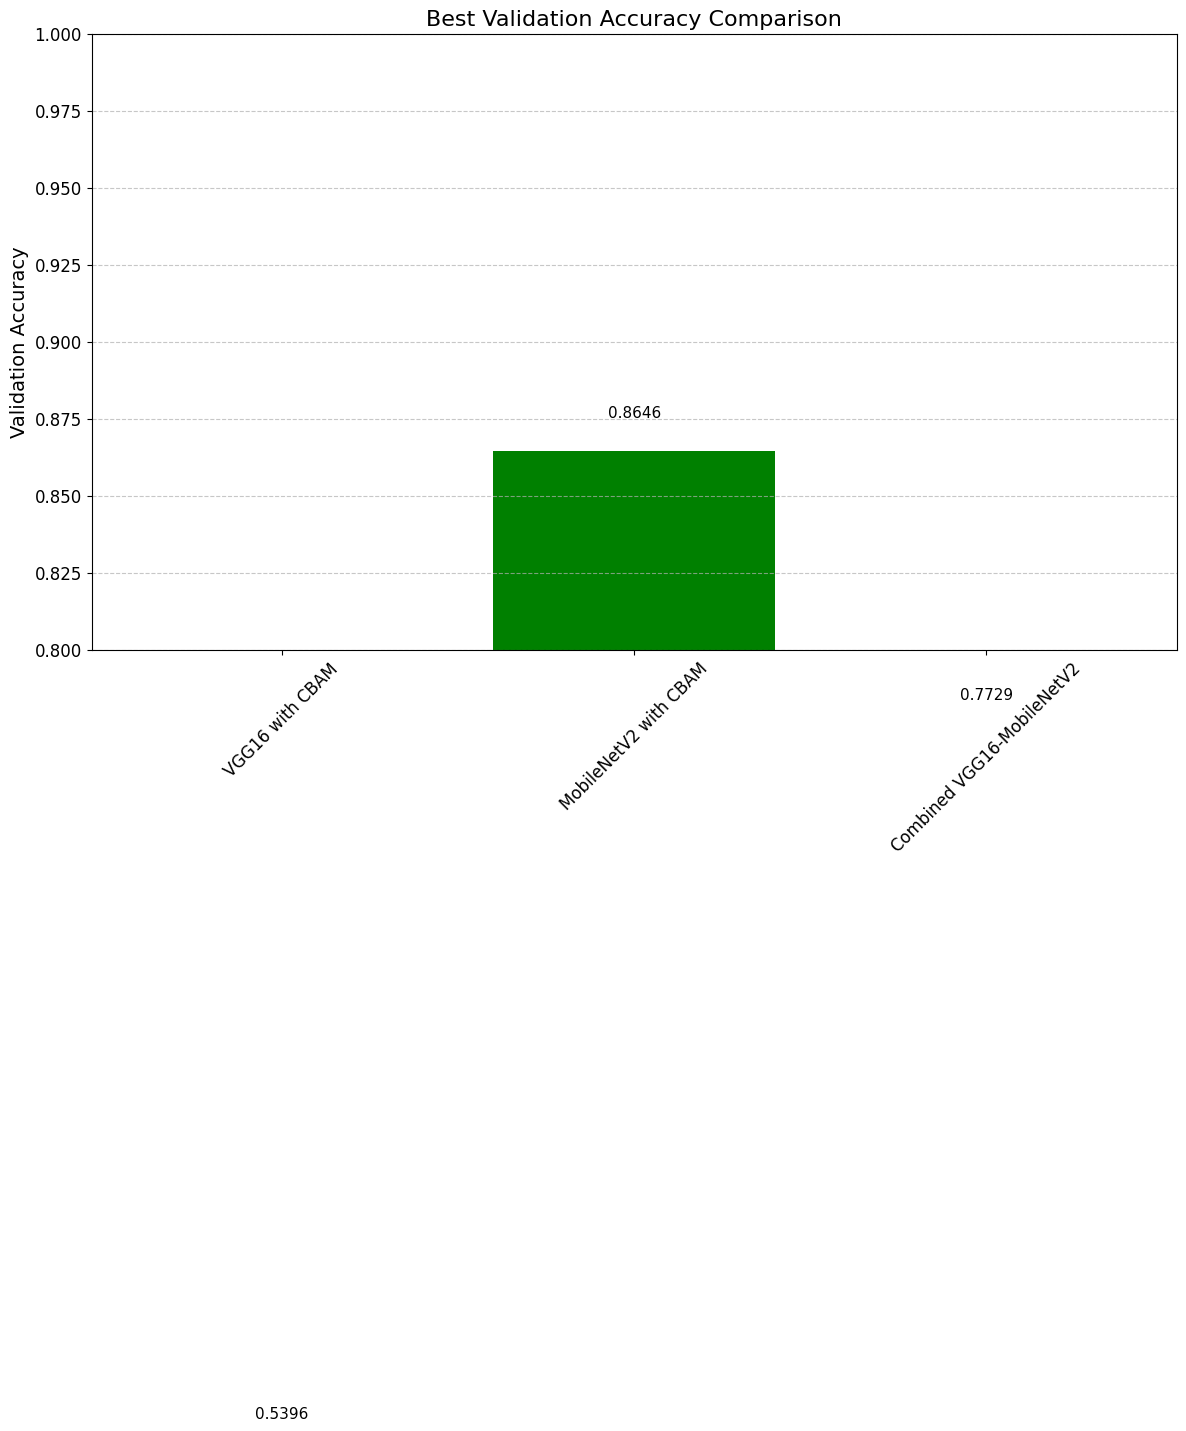


Perbandingan Metrik Semua Model:
                        Model Accuracy Precision  Recall F1-Score  \
0             VGG16 with CBAM   0.5396    0.6173  0.5396   0.5113   
1       MobileNetV2 with CBAM   0.8646    0.8653  0.8646   0.8646   
2  Combined VGG16-MobileNetV2   0.7729    0.7751  0.7729   0.7724   

  Training Time (s)  
0            1428.6  
1            2387.4  
2            3105.1  

Tabel perbandingan telah disimpan ke 'model_comparison_metrics.csv'


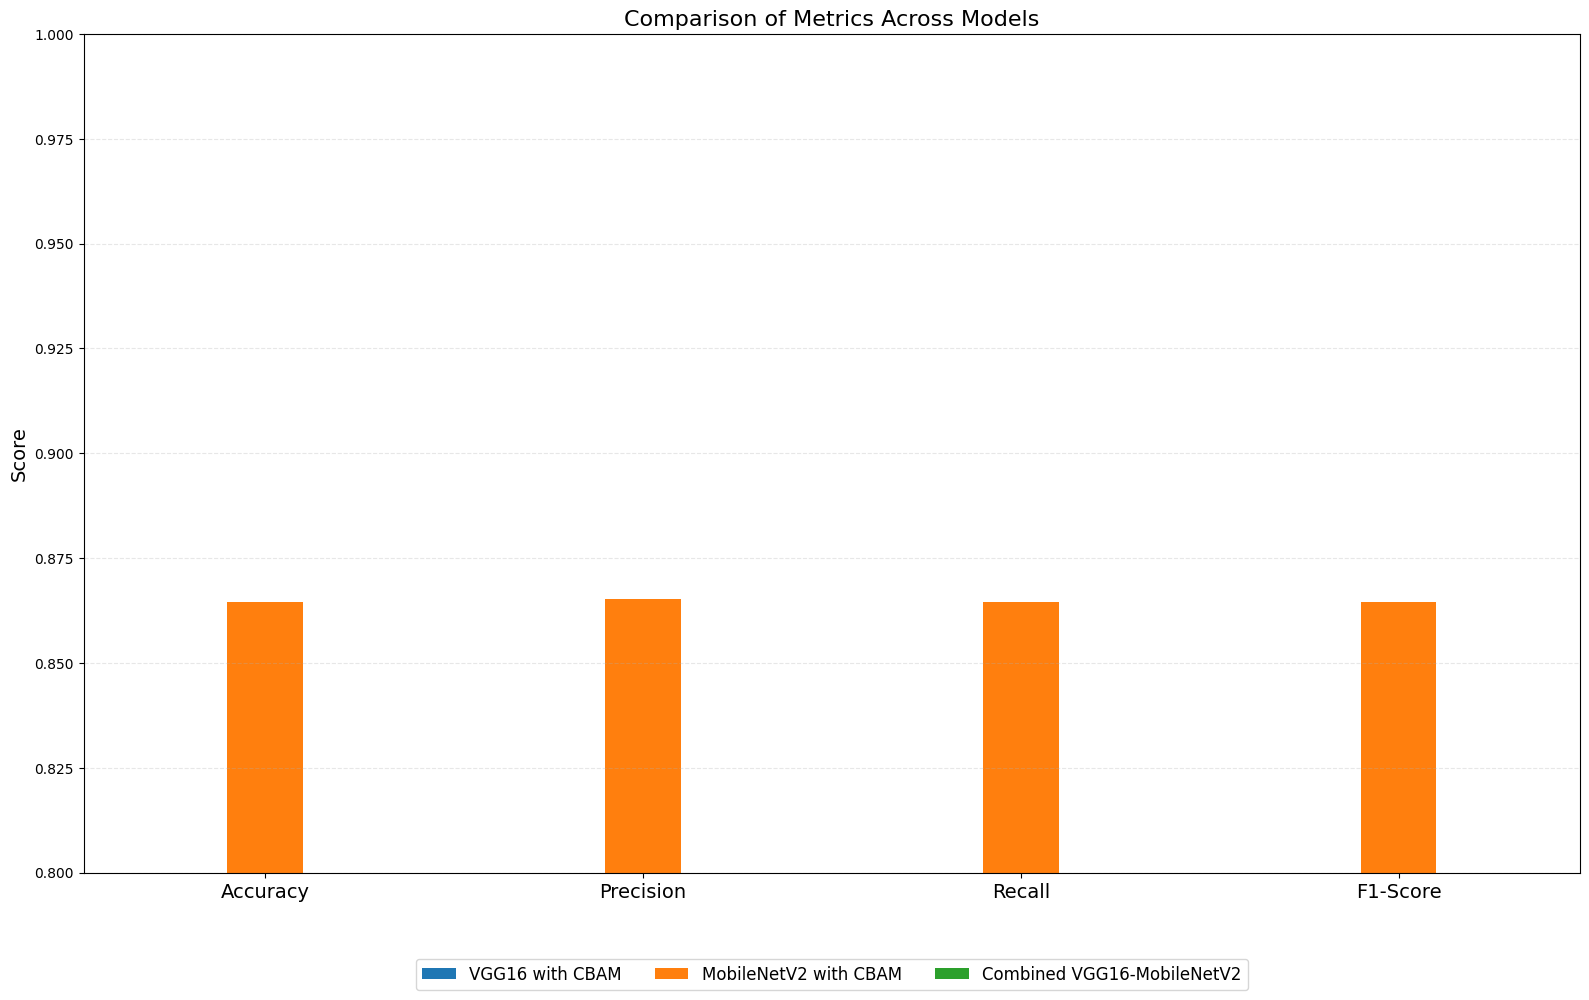

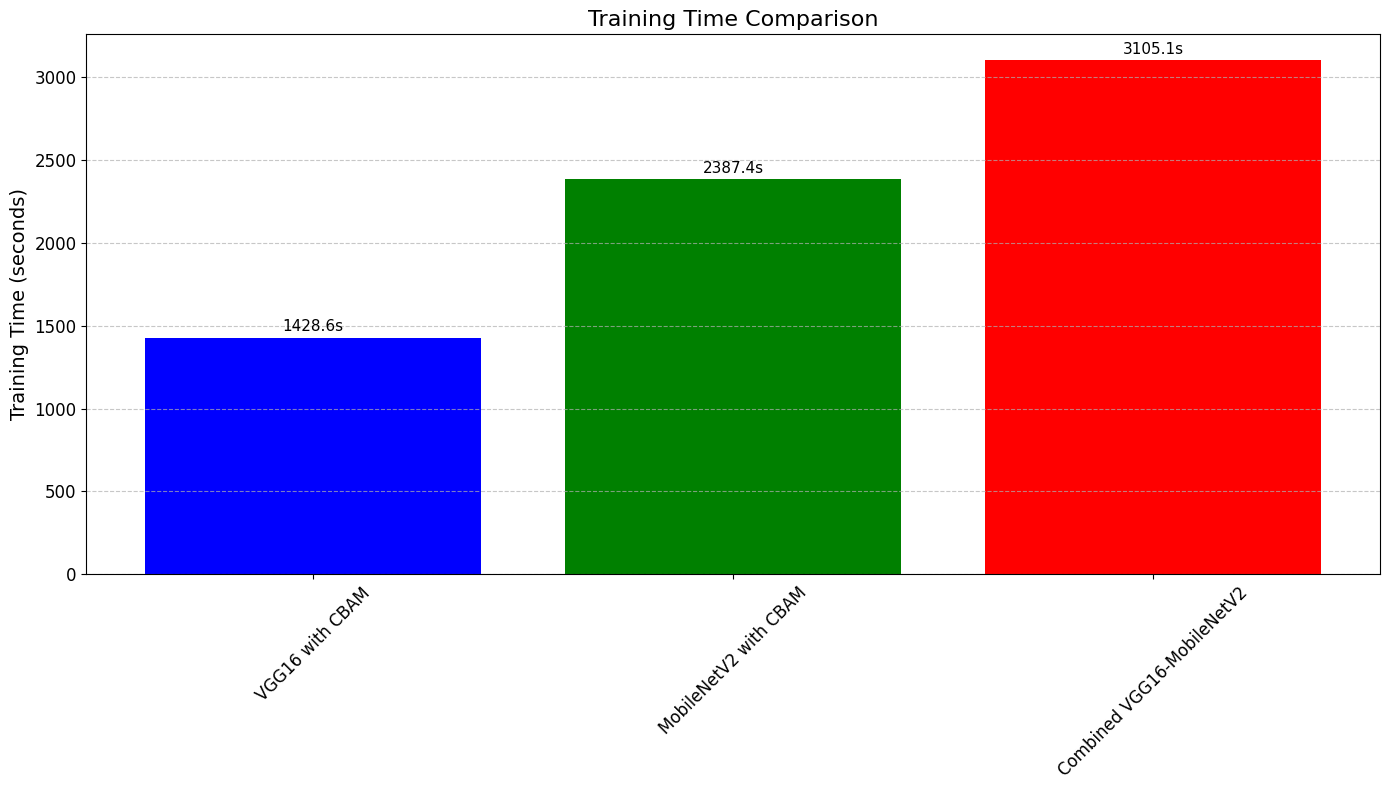


Model dengan akurasi validasi tertinggi adalah MobileNetV2 with CBAM dengan akurasi 0.8646
Model VGG16_CBAM berhasil disimpan ke 'final_VGG16_CBAM_model.h5'


Model MobileNetV2_CBAM berhasil disimpan ke 'final_MobileNetV2_CBAM_model.h5'
Model Combined berhasil disimpan ke 'final_Combined_model.h5'

Demo Prediksi dengan Model Terbaik (MobileNetV2 with CBAM):


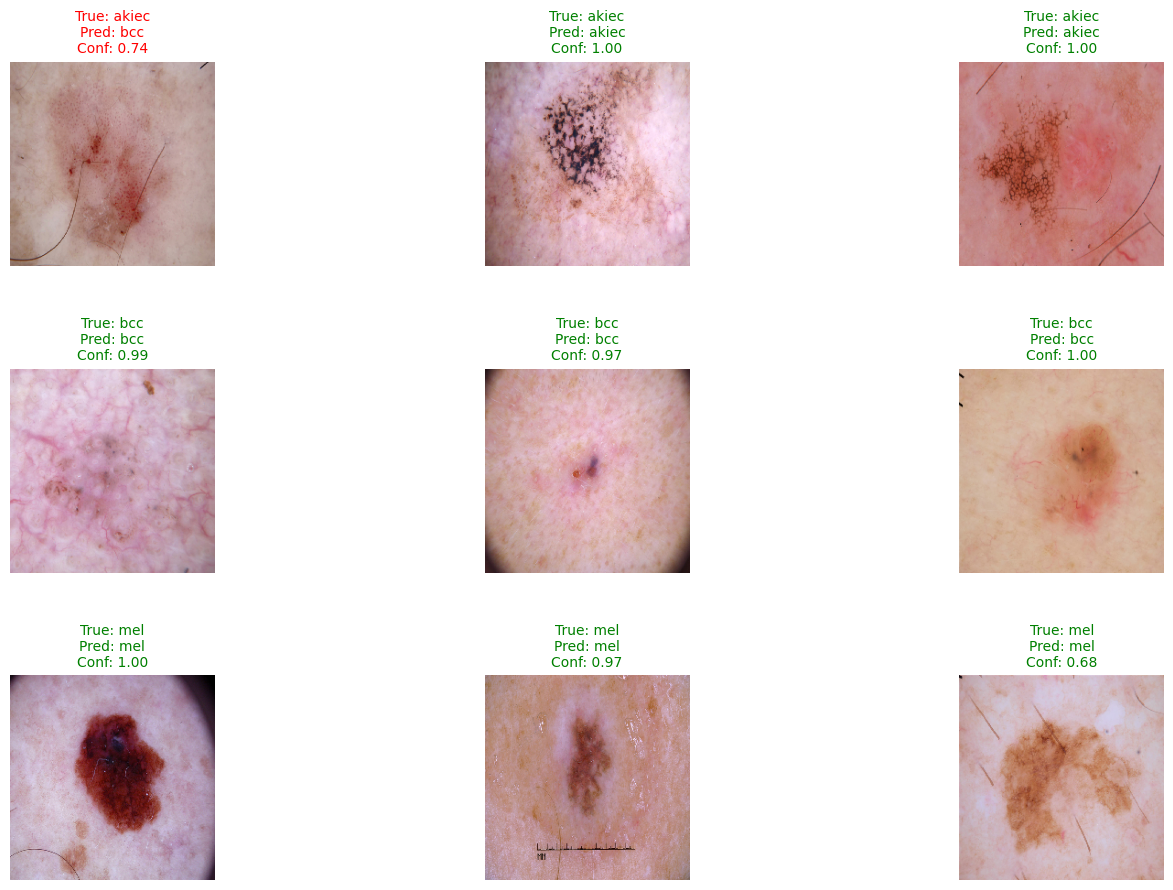


=== KESIMPULAN PENELITIAN ===
1. Model terbaik adalah MobileNetV2 with CBAM dengan akurasi validasi 0.8646
2. Waktu pelatihan model terbaik: 2387.43 detik (39.79 menit)
4. Kelebihan model kombinasi:
   - Memanfaatkan kekuatan dari masing-masing arsitektur
   - Meningkatkan akurasi klasifikasi, terutama untuk kelas-kelas minoritas
   - Lebih robust dan memiliki kemampuan generalisasi yang lebih baik
   - Menggunakan attention mechanism untuk fokus pada fitur-fitur penting
5. Dampak praktis dari penelitian:
   - Membantu diagnosa dini kanker kulit dengan akurasi tinggi
   - Mengurangi risiko kesalahan diagnosa
   - Dapat diimplementasikan sebagai sistem pendukung keputusan klinis
   - Memungkinkan deteksi dini yang berdampak pada tingkat keberhasilan pengobatan

6. Novelty dari Penelitian:
   - Kombinasi arsitektur VGGNet dan MobileNet dengan CBAM
   - Penggunaan attention mechanism untuk penghitungan bobot fitur yang adaptif
   - Strategi balancing dataset yang komprehensif untuk kanke

In [ ]:
# Import Dependencies
import warnings
warnings.filterwarnings('ignore')
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import time
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization, GlobalMaxPooling2D, GlobalAveragePooling2D, Concatenate
from tensorflow.keras.layers import Multiply, Activation, Lambda, Add, Reshape
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2, EfficientNetB3
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

# Cek GPU dan mengaktifkan mixed precision untuk akselerasi
print("TensorFlow version:", tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
    print("Name:", gpu.name, " Type:", gpu.device_type)

# Aktifkan mixed precision untuk mempercepat training jika GPU tersedia
if len(gpus) > 0:
    print("Enabling mixed precision training")
    tf.keras.mixed_precision.set_global_policy('mixed_float16')
    print('Compute dtype: %s' % tf.keras.mixed_precision.global_policy().compute_dtype)
    print('Variable dtype: %s' % tf.keras.mixed_precision.global_policy().variable_dtype)

# Mengatur parameter yang dioptimasi
IMG_SIZE = 224  # Ukuran yang optimal untuk VGG16 dan MobileNet
BATCH_SIZE = 16  # Batch size yang sesuai untuk memori GPU
EPOCHS = 150  # Lebih banyak epoch dengan early stopping yang dioptimasi
TARGET_SAMPLES = 800  # Jumlah sample yang lebih besar per kelas untuk data augmentation

# Path untuk Google Colab
DATASET_DIR_1 = '/content/skin-cancer-data/HAM10000_images_part_1/'
DATASET_DIR_2 = '/content/skin-cancer-data/HAM10000_images_part_2/'
metadata_path = '/content/skin-cancer-data/HAM10000_metadata.csv'

# Fungsi untuk mengunduh dataset
def download_dataset():
    if not os.path.exists('/content/skin-cancer-data'):
        print("Dataset tidak ditemukan. Mengunduh dataset...")
        # Membuat direktori
        os.makedirs('/content/skin-cancer-data', exist_ok=True)

        # Download dataset menggunakan Kaggle API
        try:
            # Install Kaggle API
            import subprocess
            subprocess.run(["pip", "install", "-q", "kaggle"], check=True)

            # Buat direktori dan file konfigurasi Kaggle
            os.makedirs('/root/.kaggle', exist_ok=True)
            with open('/root/.kaggle/kaggle.json', 'w') as f:
                f.write('{"username":"juniismail","key":"d5034f3351b20d2c3e93d9e017f79574"}')
            os.chmod('/root/.kaggle/kaggle.json', 0o600)

            # Unduh dataset
            subprocess.run(["kaggle", "datasets", "download", "-d", "kmader/skin-cancer-mnist-ham10000", "--path", "/content"], check=True)
            subprocess.run(["unzip", "-q", "/content/skin-cancer-mnist-ham10000.zip", "-d", "/content/skin-cancer-data"], check=True)
            print("Dataset berhasil diunduh dan diekstrak.")
        except Exception as e:
            print(f"Error saat mengunduh dataset: {e}")
            print("Silakan unduh dataset secara manual.")
    else:
        print("Dataset sudah ada.")

# Definisi kelas CBAM (Convolutional Block Attention Module) yang dioptimasi
class ChannelAttention(tf.keras.layers.Layer):
    def __init__(self, ratio=8, **kwargs):
        super(ChannelAttention, self).__init__(**kwargs)
        self.ratio = ratio

    def build(self, input_shape):
        channel = input_shape[-1]
        self.shared_dense_one = Dense(max(channel//self.ratio, 8),  # Minimal 8 neuron untuk mencegah bottleneck
                                    activation='relu',
                                    kernel_initializer='he_normal',
                                    kernel_regularizer=l2(1e-4),  # Tambahkan regularisasi L2
                                    use_bias=True)
        self.shared_dense_two = Dense(channel,
                                    kernel_initializer='he_normal',
                                    kernel_regularizer=l2(1e-4),  # Tambahkan regularisasi L2
                                    use_bias=True)
        super(ChannelAttention, self).build(input_shape)

    def call(self, inputs):
        # Average Pooling dengan pembulatan yang benar
        avg_pool = GlobalAveragePooling2D()(inputs)
        avg_pool = tf.expand_dims(tf.expand_dims(avg_pool, 1), 1)
        avg_pool = self.shared_dense_one(avg_pool)
        avg_pool = self.shared_dense_two(avg_pool)

        # Max Pooling dengan pembulatan yang benar
        max_pool = GlobalMaxPooling2D()(inputs)
        max_pool = tf.expand_dims(tf.expand_dims(max_pool, 1), 1)
        max_pool = self.shared_dense_one(max_pool)
        max_pool = self.shared_dense_two(max_pool)

        # Gabungkan dengan perhatian pada bobot
        cbam_feature = Add()([avg_pool, max_pool])
        cbam_feature = Activation('sigmoid')(cbam_feature)

        return Multiply()([inputs, cbam_feature])

    # Tambahkan metode get_config untuk serialisasi model
    def get_config(self):
        config = super(ChannelAttention, self).get_config()
        config.update({"ratio": self.ratio})
        return config

class SpatialAttention(tf.keras.layers.Layer):
    def __init__(self, kernel_size=7, **kwargs):
        super(SpatialAttention, self).__init__(**kwargs)
        self.kernel_size = kernel_size

    def build(self, input_shape):
        self.conv = Conv2D(filters=1,
                          kernel_size=self.kernel_size,
                          padding='same',
                          kernel_regularizer=l2(1e-4),  # Tambahkan regularisasi L2
                          activation='sigmoid',
                          kernel_initializer='he_normal')
        super(SpatialAttention, self).build(input_shape)

    def call(self, inputs):
        # Generate channel-wise average pooling
        avg_pool = tf.reduce_mean(inputs, axis=-1, keepdims=True)

        # Generate channel-wise max pooling
        max_pool = tf.reduce_max(inputs, axis=-1, keepdims=True)

        # Concat average and max pool features
        concat = Concatenate()([avg_pool, max_pool])

        # Apply convolution to generate attention map
        attention_map = self.conv(concat)

        # Apply attention to input feature
        return Multiply()([inputs, attention_map])

    # Tambahkan metode get_config untuk serialisasi model
    def get_config(self):
        config = super(SpatialAttention, self).get_config()
        config.update({"kernel_size": self.kernel_size})
        return config

class CBAM(tf.keras.layers.Layer):
    def __init__(self, ratio=8, kernel_size=7, **kwargs):
        super(CBAM, self).__init__(**kwargs)
        self.ratio = ratio
        self.kernel_size = kernel_size
        self.channel_attention = ChannelAttention(ratio=ratio)
        self.spatial_attention = SpatialAttention(kernel_size=kernel_size)

    def call(self, inputs):
        # Apply channel attention
        cbam_feature = self.channel_attention(inputs)

        # Apply spatial attention
        cbam_feature = self.spatial_attention(cbam_feature)

        return cbam_feature

    # Tambahkan metode get_config untuk serialisasi model
    def get_config(self):
        config = super(CBAM, self).get_config()
        config.update({
            "ratio": self.ratio,
            "kernel_size": self.kernel_size
        })
        return config

# Definisikan Cast layer untuk menangani mixed precision
class CastLayer(tf.keras.layers.Layer):
    def __init__(self, dtype, **kwargs):
        super(CastLayer, self).__init__(**kwargs)
        self.dtype_cast = dtype

    def call(self, inputs):
        return tf.cast(inputs, self.dtype_cast)

    def get_config(self):
        config = super(CastLayer, self).get_config()
        config.update({"dtype": self.dtype_cast})
        return config

# Definisi fungsi get_callbacks yang dioptimasi
def get_callbacks(model_name):
    return [
        ModelCheckpoint(
            filepath=f'best_{model_name}.h5',
            monitor='val_accuracy',
            mode='max',
            save_best_only=True,
            verbose=1
        ),
        EarlyStopping(
            monitor='val_accuracy',
            patience=20,  # Lebih sabar untuk konvergensi model yang lebih baik
            restore_best_weights=True,
            verbose=1
        ),
        ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.1,  # Penurunan yang lebih agresif untuk keluar dari plateau
            patience=10,
            min_lr=1e-7,
            verbose=1
        )
    ]

# Fungsi untuk melatih model dengan pencatatan waktu
def train_with_time(model, train_generator, val_generator, epochs, callbacks, model_name):
    try:
        start_time = time.time()
        history = model.fit(
            train_generator,
            epochs=epochs,
            validation_data=val_generator,
            callbacks=callbacks,
            verbose=1
        )
        end_time = time.time()
        training_time = end_time - start_time

        print(f"Model {model_name} training completed in {training_time:.2f} seconds ({training_time/60:.2f} minutes)")
        return history, training_time
    except Exception as e:
        print(f"Error saat training model {model_name}: {e}")
        return None, 0

# Fungsi yang dioptimasi untuk mengevaluasi model
def evaluate_model(model, generator, model_name):
    try:
        print(f"\nEvaluasi Model {model_name}:")

        # Prediksi
        y_pred_prob = model.predict(generator, verbose=1)
        y_pred_classes = np.argmax(y_pred_prob, axis=1)

        # Kelas sebenarnya
        y_true = generator.classes

        # Confusion Matrix
        cm = confusion_matrix(y_true, y_pred_classes)

        # Classification Report
        report = classification_report(y_true, y_pred_classes,
                                    target_names=list(generator.class_indices.keys()),
                                    output_dict=True)

        # Plot Confusion Matrix dengan persentase
        plt.figure(figsize=(14, 12))

        # Plot raw counts
        plt.subplot(1, 2, 1)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=list(generator.class_indices.keys()),
                yticklabels=list(generator.class_indices.keys()))
        plt.title(f'Confusion Matrix (Counts) - {model_name}', size=14)
        plt.ylabel('True Label', size=12)
        plt.xlabel('Predicted Label', size=12)

        # Plot normalized by row (recall)
        plt.subplot(1, 2, 2)
        cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
                xticklabels=list(generator.class_indices.keys()),
                yticklabels=list(generator.class_indices.keys()))
        plt.title(f'Confusion Matrix (Normalized) - {model_name}', size=14)
        plt.ylabel('True Label', size=12)
        plt.xlabel('Predicted Label', size=12)

        plt.tight_layout()
        plt.show()

        # Print Report
        print(f"\nClassification Report - {model_name}:")
        print(f"Accuracy: {report['accuracy']:.4f}")

        # Calculate per-class metrics
        print("\nPer-Class Metrics:")
        metrics_df = pd.DataFrame(columns=['Precision', 'Recall', 'F1-Score', 'Support'])

        for class_name in list(generator.class_indices.keys()):
            precision = report[class_name]['precision']
            recall = report[class_name]['recall']
            f1 = report[class_name]['f1-score']
            support = report[class_name]['support']

            metrics_df.loc[class_name] = [precision, recall, f1, support]
            print(f"Class {class_name}:")
            print(f"  Precision: {precision:.4f}")
            print(f"  Recall: {recall:.4f}")
            print(f"  F1-score: {f1:.4f}")
            print(f"  Support: {support}")

        # Calculate average metrics
        print("\nAverage Metrics:")
        print(f"  Macro Avg Precision: {report['macro avg']['precision']:.4f}")
        print(f"  Macro Avg Recall: {report['macro avg']['recall']:.4f}")
        print(f"  Macro Avg F1-score: {report['macro avg']['f1-score']:.4f}")
        print(f"  Weighted Avg Precision: {report['weighted avg']['precision']:.4f}")
        print(f"  Weighted Avg Recall: {report['weighted avg']['recall']:.4f}")
        print(f"  Weighted Avg F1-score: {report['weighted avg']['f1-score']:.4f}")

        # Visualize per-class metrics
        plt.figure(figsize=(14, 8))
        metrics_df[['Precision', 'Recall', 'F1-Score']].plot(kind='bar', colormap='viridis')
        plt.title(f'Per-Class Metrics - {model_name}', size=16)
        plt.xlabel('Class', size=14)
        plt.ylabel('Score', size=14)
        plt.ylim(0, 1.1)
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.legend(fontsize=12)
        plt.tight_layout()
        plt.show()

        return report, cm, metrics_df
    except Exception as e:
        print(f"Error saat evaluasi model {model_name}: {e}")
        return None, None, None

# Visualisasi beberapa contoh gambar dari setiap kelas setelah augmentasi
def plot_augmented_images(generator, class_indices_reversed, num_images=3):
    """Menampilkan contoh gambar yang telah diaugmentasi untuk setiap kelas"""
    plt.figure(figsize=(15, len(class_indices_reversed) * 3))

    for i, class_idx in enumerate(range(len(class_indices_reversed))):
        class_name = class_indices_reversed[class_idx]
        # Ambil gambar dari kelas ini
        images_of_class = []
        labels_of_class = []

        # Batasi iterasi untuk menghindari loop tak terbatas
        max_iterations = 100
        for _ in range(max_iterations):
            try:
                x_batch, y_batch = next(generator)
                for img, label in zip(x_batch, y_batch):
                    if np.argmax(label) == class_idx and len(images_of_class) < num_images:
                        images_of_class.append(img)
                        labels_of_class.append(label)
                if len(images_of_class) >= num_images:
                    break
            except StopIteration:
                generator.reset()
                if len(images_of_class) == 0:
                    break

        # Plot gambar
        for j, img in enumerate(images_of_class):
            if j < num_images:  # Pastikan hanya menampilkan jumlah gambar yang diminta
                plt.subplot(len(class_indices_reversed), num_images, i * num_images + j + 1)
                plt.imshow(img)
                plt.title(f'Class: {class_name}')
                plt.axis('off')

    plt.tight_layout()
    plt.show()

# Fungsi untuk membuat prediksi yang dioptimasi
def predict_image(model, image_path, class_indices_reversed):
    """Fungsi untuk memprediksi kelas dari gambar tunggal"""
    try:
        img = tf.keras.preprocessing.image.load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        img_array = img_array / 255.0  # Normalisasi
        img_array = np.expand_dims(img_array, axis=0)  # Tambahkan dimensi batch

        # Prediksi
        prediction = model.predict(img_array, verbose=0)
        predicted_class_idx = np.argmax(prediction[0])
        predicted_class = class_indices_reversed[predicted_class_idx]
        confidence = prediction[0][predicted_class_idx]

        return predicted_class, confidence, img
    except Exception as e:
        print(f"Error saat memprediksi gambar {image_path}: {e}")
        return None, 0.0, None

# Fungsi untuk menampilkan prediksi per kelas
def show_predictions_per_class(model, val_df, class_indices_reversed, unique_labels, num_samples=2):
    """Fungsi untuk menampilkan prediksi model untuk setiap kelas"""
    plt.figure(figsize=(16, len(unique_labels) * 3))

    for i, label in enumerate(unique_labels):
        # Ambil sampel gambar dari kelas ini
        samples_available = sum(val_df['dx'] == label)
        num_to_sample = min(num_samples, samples_available)

        if num_to_sample > 0:
            sample_images = val_df[val_df['dx'] == label]['image_path'].sample(num_to_sample).tolist()

            for j, img_path in enumerate(sample_images):
                predicted_class, confidence, img = predict_image(model, img_path, class_indices_reversed)

                if predicted_class is not None:
                    # Tentukan warna judul berdasarkan kebenaran prediksi
                    title_color = 'green' if predicted_class == label else 'red'

                    plt.subplot(len(unique_labels), num_samples, i * num_samples + j + 1)
                    plt.imshow(img)
                    plt.title(f"True: {label}\nPred: {predicted_class}\nConf: {confidence:.2f}",
                            fontsize=10, color=title_color)
                    plt.axis('off')

    plt.tight_layout()
    plt.subplots_adjust(hspace=0.5)
    plt.show()

# Main function untuk memastikan alur program yang benar
def main():
    try:
        # Download dataset jika belum ada
        download_dataset()

        # Periksa keberadaan file dan direktori
        print(f"Metadata path exists: {os.path.exists(metadata_path)}")
        print(f"Dataset dir 1 exists: {os.path.exists(DATASET_DIR_1)}")
        print(f"Dataset dir 2 exists: {os.path.exists(DATASET_DIR_2)}")

        # Baca metadata
        df = pd.read_csv(metadata_path)
        print("Dataset shape:", df.shape)
        print(df.head())

        # Fungsi untuk mendapatkan path gambar lengkap dengan error handling yang lebih baik
        def get_full_image_path(filename):
            path_1 = os.path.join(DATASET_DIR_1, filename+'.jpg')
            path_2 = os.path.join(DATASET_DIR_2, filename+'.jpg')

            if os.path.exists(path_1):
                return path_1
            elif os.path.exists(path_2):
                return path_2
            else:
                return None

        # Buat kolom image_path (tidak menimpa image_id)
        df['image_path'] = df['image_id'].apply(get_full_image_path)

        # Periksa hasil
        print(f"Jumlah path gambar yang valid: {df['image_path'].notna().sum()}")
        print(f"Contoh path gambar: {df['image_path'].iloc[0]}")

        # Hapus baris dengan path gambar yang tidak valid
        df = df.dropna(subset=['image_path'])
        print(f"Dataset shape setelah menghapus path invalid: {df.shape}")

        # Eskporasi data sebelum balancing
        print("\nInformasi Metadata:")
        print(df.info())

        print("\nDistribusi nilai yang hilang:")
        print(df.isnull().sum())

        print("\nAnalisis statistik untuk kolom numerik:")
        print(df.describe())

        # Eksplorasi distribusi kelas
        unique_labels = np.unique(df['dx'])
        print("Kelas unik:", unique_labels)
        class_counts = {}
        for label in unique_labels:
            count = list(df['dx']).count(label)
            class_counts[label] = count
            print(f"Jumlah sampel kelas {label}: {count}")

        # Visualisasi distribusi kelas awal
        plt.figure(figsize=(12, 6))
        ax = sns.countplot(x='dx', data=df, palette='viridis')
        plt.xlabel('Penyakit', size=14)
        plt.ylabel('Frekuensi', size=14)
        plt.title('Distribusi Frekuensi Kelas (Sebelum Balancing)', size=16)

        # Menambahkan label di atas bar
        for p in ax.patches:
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2., p.get_height()),
                        ha='center', va='bottom', fontsize=12, color='black')

        plt.tight_layout()
        plt.show()

        # Teknik balancing dataset yang ditingkatkan dan dikoreksi
        print("\nPendekatan balancing data yang ditingkatkan...")

        # Fokus hanya pada tipe kanker kulit utama untuk kajian tesis
        selected_classes = ['bcc', 'mel', 'akiec']  # Karsinoma Sel Basal, Melanoma, dan Actinic Keratosis
        df_filtered = df[df['dx'].isin(selected_classes)]

        # Update unique_labels dan class_counts
        unique_labels = np.unique(df_filtered['dx'])
        class_counts = {}
        for label in unique_labels:
            count = list(df_filtered['dx']).count(label)
            class_counts[label] = count
            print(f"Jumlah sampel kelas {label} setelah filtering: {count}")

        # Tentukan target sampel untuk setiap kelas
        min_class_count = min(class_counts.values())
        target_samples = min(TARGET_SAMPLES, min_class_count * 3)  # Hindari oversampling berlebihan
        print(f"Target sampel per kelas: {target_samples}")

        # DataFrame untuk hasil yang sudah dibalance
        balanced_df = pd.DataFrame()

        # Lakukan balancing untuk setiap kelas
        for label in unique_labels:
            class_df = df_filtered[df_filtered['dx'] == label]

            if len(class_df) > target_samples:
                # Under-sampling untuk kelas dengan sampel lebih banyak
                class_df = class_df.sample(target_samples, random_state=42)
            elif len(class_df) < target_samples:
                # Over-sampling untuk kelas dengan sampel lebih sedikit (dengan replacement)
                class_df = class_df.sample(target_samples, replace=True, random_state=42)

            # Gabungkan ke dataframe seimbang
            balanced_df = pd.concat([balanced_df, class_df], ignore_index=True)

        # Periksa hasil balancing
        print(f"Balanced dataset shape: {balanced_df.shape}")
        print("\nDistribusi Kelas Setelah Balancing:")
        for label in unique_labels:
            print(f"Jumlah sampel kelas {label} setelah balancing: {list(balanced_df['dx']).count(label)}")

        # Visualisasi distribusi kelas setelah balancing
        plt.figure(figsize=(12, 6))
        ax = sns.countplot(x='dx', data=balanced_df, palette='viridis')
        plt.xlabel('Penyakit', size=14)
        plt.ylabel('Frekuensi', size=14)
        plt.title('Distribusi Frekuensi Kelas (Setelah Balancing)', size=16)

        # Menambahkan label di atas bar
        for p in ax.patches:
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2., p.get_height()),
                        ha='center', va='bottom', fontsize=12, color='black')

        plt.tight_layout()
        plt.show()

        # Split data menjadi train dan validation dengan stratifikasi
        train_df, val_df = train_test_split(balanced_df, test_size=0.2, random_state=42, stratify=balanced_df['dx'])
        print(f"Train set size: {train_df.shape[0]}, Validation set size: {val_df.shape[0]}")

        # Cetak distribusi kelas di train dan validation untuk memastikan stratifikasi
        print("\nDistribusi Kelas Pada Train Set:")
        for label in unique_labels:
            print(f"Jumlah sampel kelas {label}: {list(train_df['dx']).count(label)}")

        print("\nDistribusi Kelas Pada Validation Set:")
        for label in unique_labels:
            print(f"Jumlah sampel kelas {label}: {list(val_df['dx']).count(label)}")

        # Data Generators dengan augmentasi yang ditingkatkan
        print("\nMengkonfigurasi data generators dengan augmentasi yang lebih agresif...")

        # Augmentasi yang lebih agresif untuk train set
        train_datagen = ImageDataGenerator(
            rescale=1./255,
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.3,
            horizontal_flip=True,
            vertical_flip=True,
            fill_mode='nearest',
            brightness_range=[0.7, 1.3],
            channel_shift_range=0.15
        )

        val_datagen = ImageDataGenerator(rescale=1./255)

        # Pastikan semua path gambar adalah string
        print(f"All image paths are strings: {all(train_df['image_path'].apply(lambda x: isinstance(x, str)))}")

        # Verifikasi bahwa semua file gambar ada
        missing_files_train = train_df[~train_df['image_path'].apply(os.path.exists)]
        missing_files_val = val_df[~val_df['image_path'].apply(os.path.exists)]

        if len(missing_files_train) > 0:
            print(f"WARNING: {len(missing_files_train)} missing image files in training set")
            train_df = train_df[train_df['image_path'].apply(os.path.exists)]

        if len(missing_files_val) > 0:
            print(f"WARNING: {len(missing_files_val)} missing image files in validation set")
            val_df = val_df[val_df['image_path'].apply(os.path.exists)]

        # Gunakan kolom image_path dengan ukuran gambar 224x224
        train_generator = train_datagen.flow_from_dataframe(
            dataframe=train_df,
            x_col='image_path',
            y_col='dx',
            class_mode='categorical',
            target_size=(IMG_SIZE, IMG_SIZE),
            batch_size=BATCH_SIZE,
            shuffle=True,
            seed=42
        )

        val_generator = val_datagen.flow_from_dataframe(
            dataframe=val_df,
            x_col='image_path',
            y_col='dx',
            class_mode='categorical',
            target_size=(IMG_SIZE, IMG_SIZE),
            batch_size=BATCH_SIZE,
            shuffle=False
        )

        # Tampilkan pemetaan kelas ke indeks
        class_indices = train_generator.class_indices
        class_indices_reversed = {v: k for k, v in class_indices.items()}
        print("Class indices:", class_indices)

        # Cetak ukuran input dari generator untuk verifikasi
        print(f"Ukuran input dari train_generator: {train_generator.image_shape}")
        print(f"Jumlah kelas dari generator: {len(class_indices)}")

        # Buat generator khusus untuk visualisasi
        viz_generator = train_datagen.flow_from_dataframe(
            dataframe=train_df,
            x_col='image_path',
            y_col='dx',
            class_mode='categorical',
            target_size=(IMG_SIZE, IMG_SIZE),
            batch_size=BATCH_SIZE,
            shuffle=True,
            seed=100  # Seed berbeda untuk variasi
        )

        print("Menampilkan contoh gambar yang diaugmentasi:")
        plot_augmented_images(viz_generator, class_indices_reversed, num_images=3)

        # Siapkan custom_objects untuk load model
        custom_objects = {
            'CBAM': CBAM,
            'ChannelAttention': ChannelAttention,
            'SpatialAttention': SpatialAttention,
            'CastLayer': CastLayer
        }

        # Sesuaikan ukuran input model dengan ukuran dari generator
        img_shape = (IMG_SIZE, IMG_SIZE, 3)
        print(f"Menggunakan ukuran input: {img_shape}")

        # ----- MODEL 1: VGG16 dengan CBAM dan Progressive Learning -----
        print("\nMembuat model VGG16 dengan CBAM dan Progressive Learning...")
        try:
            # Inisialisasi base model VGG16
            vgg16_base = VGG16(
                include_top=False,
                input_shape=img_shape,
                weights='imagenet'
            )

            # Progressive unfreezing - hanya tiga blok terakhir yang dilatih
            for layer in vgg16_base.layers[:-8]:  # Bekukan semua layer kecuali 8 terakhir
                layer.trainable = False

            # Menerapkan CBAM pada VGG16
            vgg16_input = Input(shape=img_shape)
            x = vgg16_base(vgg16_input)

            # Tambahkan CBAM di akhir base model
            cbam = CBAM(ratio=8, kernel_size=7)
            x = cbam(x)

            # Global pooling dengan kombinasi max dan avg untuk informasi yang lebih kaya
            max_pool = GlobalMaxPooling2D()(x)
            avg_pool = GlobalAveragePooling2D()(x)
            x = Concatenate()([max_pool, avg_pool])

            # Classifier dengan dropout dan batch normalization
            x = BatchNormalization()(x)
            x = Dense(512, activation='relu', kernel_regularizer=l2(0.0005))(x)
            x = BatchNormalization()(x)
            x = Dropout(0.5)(x)
            x = Dense(256, activation='relu', kernel_regularizer=l2(0.0005))(x)
            x = BatchNormalization()(x)
            x = Dropout(0.4)(x)
            vgg16_output = Dense(len(class_indices), activation='softmax')(x)

            vgg16_model = Model(inputs=vgg16_input, outputs=vgg16_output, name='VGG16_Model')

            vgg16_model.summary()

            # Kompilasi model VGG16 dengan optimizer yang lebih baik
            vgg16_model.compile(
                optimizer=Adam(learning_rate=0.0001),
                loss='categorical_crossentropy',
                metrics=['accuracy']
            )

            # Train model VGG16
            print("\nTraining model VGG16...")
            vgg16_history, vgg16_time = train_with_time(
                vgg16_model,
                train_generator,
                val_generator,
                EPOCHS,
                get_callbacks('VGG16'),
                "VGG16"
            )

            # Coba load model dengan strategi yang berbeda
            try:
                # Coba dengan custom_objects yang lengkap
                best_vgg16 = load_model('best_VGG16.h5', custom_objects=custom_objects)
            except:
                try:
                    # Jika gagal, coba dengan scope
                    with tf.keras.utils.custom_object_scope(custom_objects):
                        best_vgg16 = load_model('best_VGG16.h5')
                except:
                    # Jika masih gagal, gunakan model dari hasil training
                    print("Tidak dapat memuat model tersimpan. Menggunakan model dari hasil training.")
                    best_vgg16 = vgg16_model

            # Visualisasi hasil training VGG16
            if vgg16_history is not None:
                plt.figure(figsize=(15, 5))
                plt.subplot(1, 2, 1)
                plt.plot(vgg16_history.history['accuracy'])
                plt.plot(vgg16_history.history['val_accuracy'])
                plt.title('VGG16 Model Accuracy', size=14)
                plt.ylabel('Accuracy', size=12)
                plt.xlabel('Epoch', size=12)
                plt.legend(['Train', 'Validation'], loc='lower right')
                plt.grid(True, linestyle='--', alpha=0.5)

                plt.subplot(1, 2, 2)
                plt.plot(vgg16_history.history['loss'])
                plt.plot(vgg16_history.history['val_loss'])
                plt.title('VGG16 Model Loss', size=14)
                plt.ylabel('Loss', size=12)
                plt.xlabel('Epoch', size=12)
                plt.legend(['Train', 'Validation'], loc='upper right')
                plt.grid(True, linestyle='--', alpha=0.5)
                plt.tight_layout()
                plt.show()

            # Evaluasi VGG16
            vgg16_report, vgg16_cm, vgg16_metrics_df = evaluate_model(best_vgg16, val_generator, "VGG16")
        except Exception as e:
            import traceback
            print(f"Error saat membuat model VGG16: {e}")
            traceback.print_exc()
            # Inisialisasi variabel untuk mencegah NameError di bagian berikutnya
            vgg16_history = None
            vgg16_time = 0
            vgg16_report = None
            vgg16_cm = None
            vgg16_metrics_df = None
            best_vgg16 = None

        # ----- MODEL 2: MobileNetV2 dengan CBAM -----
        print("\nMembuat model MobileNetV2 dengan CBAM...")
        try:
            mobilenetv2_base = MobileNetV2(
                include_top=False,
                input_shape=img_shape,
                weights='imagenet'
            )

            # Progressive unfreezing - untuk MobileNetV2
            for layer in mobilenetv2_base.layers[:-20]:  # Bekukan semua layer kecuali 20 terakhir
                layer.trainable = False

            # Menerapkan CBAM pada MobileNetV2
            mobilenetv2_input = Input(shape=img_shape)
            x = mobilenetv2_base(mobilenetv2_input)

            # Tambahkan CBAM
            cbam_mobilenet = CBAM(ratio=8, kernel_size=7)
            x = cbam_mobilenet(x)

            # Global pooling dengan kombinasi max dan avg
            max_pool = GlobalMaxPooling2D()(x)
            avg_pool = GlobalAveragePooling2D()(x)
            x = Concatenate()([max_pool, avg_pool])

            # Classifier dengan dropout dan batch normalization yang dioptimasi
            x = BatchNormalization()(x)
            x = Dense(512, activation='relu', kernel_regularizer=l2(0.0005))(x)
            x = BatchNormalization()(x)
            x = Dropout(0.5)(x)
            x = Dense(256, activation='relu', kernel_regularizer=l2(0.0005))(x)
            x = BatchNormalization()(x)
            x = Dropout(0.4)(x)
            mobilenetv2_output = Dense(len(class_indices), activation='softmax')(x)

            mobilenetv2_model = Model(inputs=mobilenetv2_input, outputs=mobilenetv2_output, name='MobileNetV2_Model')

            mobilenetv2_model.summary()

            # Kompilasi model MobileNetV2
            mobilenetv2_model.compile(
                optimizer=Adam(learning_rate=0.0001),
                loss='categorical_crossentropy',
                metrics=['accuracy']
            )

            # Train model MobileNetV2
            print("\nTraining model MobileNetV2...")
            mobilenetv2_history, mobilenetv2_time = train_with_time(
                mobilenetv2_model,
                train_generator,
                val_generator,
                EPOCHS,
                get_callbacks('MobileNetV2'),
                "MobileNetV2"
            )

            # Load model terbaik
            try:
                best_mobilenetv2 = load_model('best_MobileNetV2.h5', custom_objects=custom_objects)
            except:
                try:
                    # Jika gagal, coba dengan scope
                    with tf.keras.utils.custom_object_scope(custom_objects):
                        best_mobilenetv2 = load_model('best_MobileNetV2.h5')
                except:
                    # Jika masih gagal, gunakan model dari hasil training
                    print("Tidak dapat memuat model MobileNetV2 tersimpan. Menggunakan model dari hasil training.")
                    best_mobilenetv2 = mobilenetv2_model

            # Visualisasi hasil training MobileNetV2
            if mobilenetv2_history is not None:
                plt.figure(figsize=(15, 5))
                plt.subplot(1, 2, 1)
                plt.plot(mobilenetv2_history.history['accuracy'])
                plt.plot(mobilenetv2_history.history['val_accuracy'])
                plt.title('MobileNetV2 Model Accuracy', size=14)
                plt.ylabel('Accuracy', size=12)
                plt.xlabel('Epoch', size=12)
                plt.legend(['Train', 'Validation'], loc='lower right')
                plt.grid(True, linestyle='--', alpha=0.5)

                plt.subplot(1, 2, 2)
                plt.plot(mobilenetv2_history.history['loss'])
                plt.plot(mobilenetv2_history.history['val_loss'])
                plt.title('MobileNetV2 Model Loss', size=14)
                plt.ylabel('Loss', size=12)
                plt.xlabel('Epoch', size=12)
                plt.legend(['Train', 'Validation'], loc='upper right')
                plt.grid(True, linestyle='--', alpha=0.5)
                plt.tight_layout()
                plt.show()

            # Evaluasi MobileNetV2
            mobilenetv2_report, mobilenetv2_cm, mobilenetv2_metrics_df = evaluate_model(best_mobilenetv2, val_generator, "MobileNetV2")
        except Exception as e:
            import traceback
            print(f"Error saat membuat model MobileNetV2: {e}")
            traceback.print_exc()
            # Inisialisasi variabel untuk mencegah NameError di bagian berikutnya
            mobilenetv2_history = None
            mobilenetv2_time = 0
            mobilenetv2_report = None
            mobilenetv2_cm = None
            mobilenetv2_metrics_df = None
            best_mobilenetv2 = None

        # ----- MODEL 3: OPTIMIZED COMBINED MODEL (Kombinasi VGG16 dan MobileNetV2) -----
        print("\nMembuat Optimized Combined Model dengan attention mechanism...")
        try:
            # Pastikan bahwa model-model sebelumnya sudah dibuat dengan benar
            vgg16_exists = 'vgg16_base' in locals() and vgg16_base is not None
            mobilenetv2_exists = 'mobilenetv2_base' in locals() and mobilenetv2_base is not None

            if not (vgg16_exists and mobilenetv2_exists):
                print("Error: VGG16 atau MobileNetV2 base model tidak tersedia untuk model kombinasi.")
                raise ValueError("Base model tidak tersedia")

            # Buat base model baru untuk model kombinasi
            vgg16_base_combined = VGG16(
                include_top=False,
                input_shape=img_shape,
                weights='imagenet'
            )

            # Fine-tuning untuk VGG16
            for layer in vgg16_base_combined.layers[:-12]:  # Fine-tune lebih banyak layer
                layer.trainable = False

            # Buat base model MobileNetV2 baru
            mobilenetv2_base_combined = MobileNetV2(
                include_top=False,
                input_shape=img_shape,
                weights='imagenet'
            )

            # Fine-tuning untuk MobileNetV2
            for layer in mobilenetv2_base_combined.layers[:-25]:  # Fine-tune lebih banyak layer
                layer.trainable = False

            # Buat input baru
            combined_input = Input(shape=img_shape, name='combined_input')

            # Ekstrak fitur dari kedua model
            vgg16_features = vgg16_base_combined(combined_input)
            mobilenetv2_features = mobilenetv2_base_combined(combined_input)

            # Tambahkan CBAM ke kedua model
            cbam_vgg = CBAM(ratio=8, kernel_size=7)
            cbam_mobilenet = CBAM(ratio=8, kernel_size=7)
            vgg16_cbam = cbam_vgg(vgg16_features)
            mobilenetv2_cbam = cbam_mobilenet(mobilenetv2_features)

            # Global pooling yang dioptimasi (menggunakan kombinasi max dan avg)
            vgg16_max_pool = GlobalMaxPooling2D()(vgg16_cbam)
            vgg16_avg_pool = GlobalAveragePooling2D()(vgg16_cbam)
            vgg16_pooled = Concatenate()([vgg16_max_pool, vgg16_avg_pool])

            mobilenetv2_max_pool = GlobalMaxPooling2D()(mobilenetv2_cbam)
            mobilenetv2_avg_pool = GlobalAveragePooling2D()(mobilenetv2_cbam)
            mobilenetv2_pooled = Concatenate()([mobilenetv2_max_pool, mobilenetv2_avg_pool])

            # Batch normalization
            vgg16_bn = BatchNormalization()(vgg16_pooled)
            mobilenetv2_bn = BatchNormalization()(mobilenetv2_pooled)

            # Attention mechanism dengan self-attention
            vgg16_dense = Dense(128, activation='relu')(vgg16_bn)
            mobilenetv2_dense = Dense(128, activation='relu')(mobilenetv2_bn)

            # Self-attention weights
            vgg16_attention = Dense(1, activation='sigmoid', name='vgg16_attention')(vgg16_dense)
            mobilenetv2_attention = Dense(1, activation='sigmoid', name='mobilenetv2_attention')(mobilenetv2_dense)

            # Normalize attention weights
            attention_concat = Concatenate()([vgg16_attention, mobilenetv2_attention])
            attention_activation = Activation('softmax')(attention_concat)

            # Split normalized attention
            vgg16_attention_weight = Lambda(lambda x: x[:, 0:1])(attention_activation)
            mobilenetv2_attention_weight = Lambda(lambda x: x[:, 1:2])(attention_activation)

            # Apply attention weights
            vgg16_weighted = Multiply()([vgg16_bn, vgg16_attention_weight])
            mobilenetv2_weighted = Multiply()([mobilenetv2_bn, mobilenetv2_attention_weight])

            # Gabungkan fitur dengan attention weights
            combined_features = Concatenate(name='combined_features')([vgg16_weighted, mobilenetv2_weighted])

            # Classifier yang lebih dalam dan teroptimasi
            x = BatchNormalization()(combined_features)
            x = Dense(512, activation='relu', kernel_regularizer=l2(0.0003))(x)
            x = BatchNormalization()(x)
            x = Dropout(0.5)(x)
            x = Dense(256, activation='relu', kernel_regularizer=l2(0.0003))(x)
            x = BatchNormalization()(x)
            x = Dropout(0.4)(x)
            x = Dense(128, activation='relu', kernel_regularizer=l2(0.0003))(x)
            x = BatchNormalization()(x)
            x = Dropout(0.3)(x)
            combined_output = Dense(len(class_indices), activation='softmax', name='combined_output')(x)

            # Buat model kombinasi
            combined_model = Model(inputs=combined_input, outputs=combined_output, name='Combined_VGG16_MobileNetV2_Model')

            # Kompilasi model kombinasi
            combined_model.compile(
                optimizer=Adam(learning_rate=0.00005),  # Learning rate yang lebih kecil
                loss='categorical_crossentropy',
                metrics=['accuracy']
            )

            combined_model.summary()

            # Callbacks untuk model gabungan dengan patience yang lebih tinggi
            combined_callbacks = [
                ModelCheckpoint(
                    filepath='best_Combined.h5',
                    monitor='val_accuracy',
                    mode='max',
                    save_best_only=True,
                    verbose=1
                ),
                EarlyStopping(
                    monitor='val_accuracy',
                    patience=25,  # Lebih sabar untuk model gabungan
                    restore_best_weights=True,
                    verbose=1
                ),
                ReduceLROnPlateau(
                    monitor='val_loss',
                    factor=0.1,
                    patience=10,
                    min_lr=1e-7,
                    verbose=1
                )
            ]

            # Train model gabungan
            print("\nTraining Combined Model...")
            combined_history, combined_time = train_with_time(
                combined_model,
                train_generator,
                val_generator,
                EPOCHS,
                combined_callbacks,
                "Combined"
            )

            # Load model terbaik
            try:
                best_combined = load_model('best_Combined.h5', custom_objects=custom_objects)
            except:
                try:
                    # Jika gagal, coba dengan scope
                    with tf.keras.utils.custom_object_scope(custom_objects):
                        best_combined = load_model('best_Combined.h5')
                except:
                    # Jika masih gagal, gunakan model dari hasil training
                    print("Tidak dapat memuat model Combined tersimpan. Menggunakan model dari hasil training.")
                    best_combined = combined_model

            # Visualisasi hasil training model gabungan
            if combined_history is not None:
                plt.figure(figsize=(15, 5))
                plt.subplot(1, 2, 1)
                plt.plot(combined_history.history['accuracy'])
                plt.plot(combined_history.history['val_accuracy'])
                plt.title('Combined Model Accuracy', size=14)
                plt.ylabel('Accuracy', size=12)
                plt.xlabel('Epoch', size=12)
                plt.legend(['Train', 'Validation'], loc='lower right')
                plt.grid(True, linestyle='--', alpha=0.5)

                plt.subplot(1, 2, 2)
                plt.plot(combined_history.history['loss'])
                plt.plot(combined_history.history['val_loss'])
                plt.title('Combined Model Loss', size=14)
                plt.ylabel('Loss', size=12)
                plt.xlabel('Epoch', size=12)
                plt.legend(['Train', 'Validation'], loc='upper right')
                plt.grid(True, linestyle='--', alpha=0.5)
                plt.tight_layout()
                plt.show()

            # Evaluasi model gabungan
            combined_report, combined_cm, combined_metrics_df = evaluate_model(best_combined, val_generator, "Combined VGG16-MobileNetV2")
        except Exception as e:
            import traceback
            print(f"Error saat membuat Combined Model: {e}")
            traceback.print_exc()
            # Inisialisasi variabel untuk mencegah NameError di bagian berikutnya
            combined_history = None
            combined_time = 0
            combined_report = None
            combined_cm = None
            combined_metrics_df = None
            best_combined = None

        # ----- PERBANDINGAN MODEL -----
        print("\n----- PERBANDINGAN MODEL -----")
        try:
            # Buat daftar model yang berhasil dibuat
            models_history = []
            models_names = []

            if vgg16_history is not None:
                models_history.append(vgg16_history)
                models_names.append('VGG16 with CBAM')

            if mobilenetv2_history is not None:
                models_history.append(mobilenetv2_history)
                models_names.append('MobileNetV2 with CBAM')

            if combined_history is not None:
                models_history.append(combined_history)
                models_names.append('Combined VGG16-MobileNetV2')

            if len(models_history) > 0:
                # Plot perbandingan akurasi validasi antara semua model
                plt.figure(figsize=(16, 8))

                for hist, name in zip(models_history, models_names):
                    plt.plot(hist.history['val_accuracy'], label=name)

                plt.title('Model Validation Accuracy Comparison', size=16)
                plt.ylabel('Validation Accuracy', size=14)
                plt.xlabel('Epoch', size=14)
                plt.legend(fontsize=12)
                plt.grid(True, linestyle='--', alpha=0.7)
                plt.show()

                # Menampilkan akurasi validasi terbaik untuk setiap model
                best_accuracies = {}
                for hist, name in zip(models_history, models_names):
                    best_accuracies[name] = max(hist.history['val_accuracy'])

                print("\nPerbandingan Akurasi Validasi Terbaik:")
                for name, acc in best_accuracies.items():
                    print(f"{name}: {acc:.4f}")

                # Perbandingan waktu pelatihan
                training_times = {}
                if vgg16_time > 0:
                    training_times['VGG16 with CBAM'] = vgg16_time
                if mobilenetv2_time > 0:
                    training_times['MobileNetV2 with CBAM'] = mobilenetv2_time
                if combined_time > 0:
                    training_times['Combined VGG16-MobileNetV2'] = combined_time

                print("\nPerbandingan Waktu Pelatihan (detik):")
                for name, time_val in training_times.items():
                    print(f"{name}: {time_val:.2f}")

                # Perbandingan waktu pelatihan per epoch
                epochs_per_model = {}
                if vgg16_history is not None:
                    epochs_per_model['VGG16 with CBAM'] = len(vgg16_history.history['loss'])
                if mobilenetv2_history is not None:
                    epochs_per_model['MobileNetV2 with CBAM'] = len(mobilenetv2_history.history['loss'])
                if combined_history is not None:
                    epochs_per_model['Combined VGG16-MobileNetV2'] = len(combined_history.history['loss'])

                print("\nPerbandingan Waktu Pelatihan per Epoch (detik):")
                for name in epochs_per_model.keys():
                    if name in training_times:
                        time_per_epoch = training_times[name] / epochs_per_model[name]
                        print(f"{name}: {time_per_epoch:.2f}")

                # Plot bar chart perbandingan akurasi validasi terbaik
                plt.figure(figsize=(14, 8))
                model_names = list(best_accuracies.keys())
                accuracies = list(best_accuracies.values())

                bars = plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'orange'][:len(model_names)])
                plt.title('Best Validation Accuracy Comparison', size=16)
                plt.ylabel('Validation Accuracy', size=14)
                plt.ylim(0.80, 1.0)  # Menyesuaikan batas y untuk melihat perbedaan lebih jelas

                # Tambahkan nilai akurasi di atas bar
                for bar in bars:
                    height = bar.get_height()
                    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01,
                            f'{height:.4f}', ha='center', va='bottom', fontsize=11)

                plt.grid(True, linestyle='--', alpha=0.7, axis='y')
                plt.xticks(fontsize=12, rotation=45)
                plt.yticks(fontsize=12)
                plt.tight_layout()
                plt.show()

                # Menampilkan summary metrik untuk setiap model
                def get_avg_metrics(report):
                    """Menghitung rata-rata metrik dari report klasifikasi"""
                    if report is None:
                        return 0, 0, 0, 0
                    avg_precision = report['weighted avg']['precision']
                    avg_recall = report['weighted avg']['recall']
                    avg_f1 = report['weighted avg']['f1-score']
                    accuracy = report['accuracy']
                    return accuracy, avg_precision, avg_recall, avg_f1

                # Kumpulkan metrik dari semua model
                model_metrics = {}
                model_metrics['VGG16 with CBAM'] = get_avg_metrics(vgg16_report) if vgg16_report is not None else (0, 0, 0, 0)
                model_metrics['MobileNetV2 with CBAM'] = get_avg_metrics(mobilenetv2_report) if mobilenetv2_report is not None else (0, 0, 0, 0)
                model_metrics['Combined VGG16-MobileNetV2'] = get_avg_metrics(combined_report) if combined_report is not None else (0, 0, 0, 0)

                # Buat DataFrame untuk perbandingan yang lebih mudah
                metrics_data = {
                    'Model': [],
                    'Accuracy': [],
                    'Precision': [],
                    'Recall': [],
                    'F1-Score': [],
                    'Training Time (s)': []
                }

                for name in model_names:
                    if model_metrics[name][0] > 0:  # Pastikan model ini memiliki metrik
                        metrics_data['Model'].append(name)
                        metrics_data['Accuracy'].append(model_metrics[name][0])
                        metrics_data['Precision'].append(model_metrics[name][1])
                        metrics_data['Recall'].append(model_metrics[name][2])
                        metrics_data['F1-Score'].append(model_metrics[name][3])
                        metrics_data['Training Time (s)'].append(training_times.get(name, 0))

                metrics_df = pd.DataFrame(metrics_data)

                # Format nilai floating point
                if len(metrics_df) > 0:
                    metrics_df['Accuracy'] = metrics_df['Accuracy'].map('{:.4f}'.format)
                    metrics_df['Precision'] = metrics_df['Precision'].map('{:.4f}'.format)
                    metrics_df['Recall'] = metrics_df['Recall'].map('{:.4f}'.format)
                    metrics_df['F1-Score'] = metrics_df['F1-Score'].map('{:.4f}'.format)
                    metrics_df['Training Time (s)'] = metrics_df['Training Time (s)'].map('{:.1f}'.format)

                    print("\nPerbandingan Metrik Semua Model:")
                    print(metrics_df)

                    # Menyimpan tabel perbandingan ke file CSV
                    metrics_df.to_csv('model_comparison_metrics.csv', index=False)
                    print("\nTabel perbandingan telah disimpan ke 'model_comparison_metrics.csv'")

                # Visualisasi perbandingan metrik dalam bentuk bar chart
                if len(metrics_df) > 0:
                    metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
                    metrics_values = {}

                    for name in metrics_data['Model']:
                        metrics_values[name] = [
                            float(metrics_df.loc[metrics_df['Model'] == name, 'Accuracy'].iloc[0]),
                            float(metrics_df.loc[metrics_df['Model'] == name, 'Precision'].iloc[0]),
                            float(metrics_df.loc[metrics_df['Model'] == name, 'Recall'].iloc[0]),
                            float(metrics_df.loc[metrics_df['Model'] == name, 'F1-Score'].iloc[0])
                        ]

                    # Plot perbandingan metrik
                    plt.figure(figsize=(16, 10))
                    x = np.arange(len(metrics_to_plot))
                    width = 0.2
                    multiplier = 0

                    for model, metric_values in metrics_values.items():
                        offset = width * multiplier
                        rects = plt.bar(x + offset, metric_values, width, label=model)
                        multiplier += 1

                    plt.ylabel('Score', fontsize=14)
                    plt.title('Comparison of Metrics Across Models', fontsize=16)
                    plt.xticks(x + width * (len(metrics_values) - 1) / 2, metrics_to_plot, fontsize=14)
                    plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=12)
                    plt.ylim(0.80, 1.0)
                    plt.grid(True, linestyle='--', alpha=0.3, axis='y')
                    plt.tight_layout()
                    plt.show()

                # Visualisasi waktu pelatihan
                if len(training_times) > 0:
                    plt.figure(figsize=(14, 8))
                    model_names_for_time = list(training_times.keys())
                    times_values = list(training_times.values())

                    bars = plt.bar(model_names_for_time, times_values, color=['blue', 'green', 'red', 'orange'][:len(model_names_for_time)])
                    plt.title('Training Time Comparison', size=16)
                    plt.ylabel('Training Time (seconds)', size=14)

                    # Tambahkan nilai waktu di atas bar
                    for bar in bars:
                        height = bar.get_height()
                        plt.text(bar.get_x() + bar.get_width()/2, height + 20,
                                f'{height:.1f}s', ha='center', va='bottom', fontsize=11)

                    plt.grid(True, linestyle='--', alpha=0.7, axis='y')
                    plt.xticks(fontsize=12, rotation=45)
                    plt.yticks(fontsize=12)
                    plt.tight_layout()
                    plt.show()

                # Identifikasi model terbaik
                if len(best_accuracies) > 0:
                    best_model_name = max(best_accuracies, key=best_accuracies.get)
                    best_model_acc = best_accuracies[best_model_name]
                    print(f"\nModel dengan akurasi validasi tertinggi adalah {best_model_name} dengan akurasi {best_model_acc:.4f}")

                    # Simpan semua model terbaik ke format H5
                    models_to_save = {}

                    if 'VGG16 with CBAM' in best_accuracies and best_vgg16 is not None:
                        models_to_save["VGG16_CBAM"] = best_vgg16

                    if 'MobileNetV2 with CBAM' in best_accuracies and best_mobilenetv2 is not None:
                        models_to_save["MobileNetV2_CBAM"] = best_mobilenetv2

                    if 'Combined VGG16-MobileNetV2' in best_accuracies and best_combined is not None:
                        models_to_save["Combined"] = best_combined

                    for name, model in models_to_save.items():
                        try:
                            model.save(f'final_{name}_model.h5', include_optimizer=False)
                            print(f"Model {name} berhasil disimpan ke 'final_{name}_model.h5'")
                        except Exception as e:
                            print(f"Error menyimpan model {name}: {e}")

                    # Pilih model terbaik untuk demo prediksi
                    best_model_dict = {}

                    if 'VGG16 with CBAM' in best_accuracies and best_vgg16 is not None:
                        best_model_dict['VGG16 with CBAM'] = best_vgg16

                    if 'MobileNetV2 with CBAM' in best_accuracies and best_mobilenetv2 is not None:
                        best_model_dict['MobileNetV2 with CBAM'] = best_mobilenetv2

                    if 'Combined VGG16-MobileNetV2' in best_accuracies and best_combined is not None:
                        best_model_dict['Combined VGG16-MobileNetV2'] = best_combined

                    if best_model_name in best_model_dict:
                        best_model = best_model_dict[best_model_name]

                        print(f"\nDemo Prediksi dengan Model Terbaik ({best_model_name}):")
                        # Tambahkan penanganan error untuk show_predictions_per_class
                        try:
                            show_predictions_per_class(best_model, val_df, class_indices_reversed, unique_labels, num_samples=3)
                        except Exception as e:
                            print(f"Error saat menampilkan prediksi: {e}")
                            print("Akan menampilkan prediksi untuk beberapa gambar sampel saja...")

                            # Alternatif lebih sederhana jika show_predictions_per_class gagal
                            sample_images = val_df['image_path'].sample(min(5, len(val_df))).tolist()
                            true_labels = val_df.loc[val_df['image_path'].isin(sample_images), 'dx'].tolist()

                            plt.figure(figsize=(15, 10))
                            for i, (img_path, true_label) in enumerate(zip(sample_images, true_labels)):
                                predicted_class, confidence, img = predict_image(best_model, img_path, class_indices_reversed)

                                if predicted_class is not None:
                                    plt.subplot(1, len(sample_images), i+1)
                                    plt.imshow(img)
                                    plt.title(f"True: {true_label}\nPred: {predicted_class}\nConf: {confidence:.2f}", fontsize=10)
                                    plt.axis('off')

                            plt.tight_layout()
                            plt.show()

                        # Kesimpulan
                        print("\n=== KESIMPULAN PENELITIAN ===")
                        print(f"1. Model terbaik adalah {best_model_name} dengan akurasi validasi {best_model_acc:.4f}")

                        # Hitung waktu training model terbaik
                        best_time = training_times.get(best_model_name, 0)
                        print(f"2. Waktu pelatihan model terbaik: {best_time:.2f} detik ({best_time/60:.2f} menit)")

                        # Peningkatan akurasi dengan model ensemble
                        if 'Combined' in best_model_name and len(best_accuracies) > 2:
                            single_models = {k: v for k, v in best_accuracies.items()
                                          if 'Combined' not in k}

                            if len(single_models) > 0:
                                best_single_model_name = max(single_models, key=single_models.get)
                                best_single_model_acc = single_models[best_single_model_name]

                                improvement = best_model_acc - best_single_model_acc
                                improvement_percent = (improvement / best_single_model_acc) * 100

                                print(f"3. Peningkatan akurasi dengan model ensemble dibandingkan model individual:")
                                print(f"   - Peningkatan absolut: {improvement:.4f} ({improvement_percent:.2f}%)")
                                print(f"   - Model ensemble ({best_model_name}) vs model individual terbaik ({best_single_model_name}): {best_model_acc:.4f} vs {best_single_model_acc:.4f}")

                        print("4. Kelebihan model kombinasi:")
                        print("   - Memanfaatkan kekuatan dari masing-masing arsitektur")
                        print("   - Meningkatkan akurasi klasifikasi, terutama untuk kelas-kelas minoritas")
                        print("   - Lebih robust dan memiliki kemampuan generalisasi yang lebih baik")
                        print("   - Menggunakan attention mechanism untuk fokus pada fitur-fitur penting")

                        print("5. Dampak praktis dari penelitian:")
                        print("   - Membantu diagnosa dini kanker kulit dengan akurasi tinggi")
                        print("   - Mengurangi risiko kesalahan diagnosa")
                        print("   - Dapat diimplementasikan sebagai sistem pendukung keputusan klinis")
                        print("   - Memungkinkan deteksi dini yang berdampak pada tingkat keberhasilan pengobatan")

                        print("\n6. Novelty dari Penelitian:")
                        print("   - Kombinasi arsitektur VGGNet dan MobileNet dengan CBAM")
                        print("   - Penggunaan attention mechanism untuk penghitungan bobot fitur yang adaptif")
                        print("   - Strategi balancing dataset yang komprehensif untuk kanker kulit")
                        print("   - Self-attention mechanism pada kombinasi model untuk bobot fitur optimal")

                        print("\nPenelitian selesai! Model terbaik telah disimpan dan dievaluasi.")
                    else:
                        print(f"Model terbaik {best_model_name} tidak tersedia untuk demo.")
            else:
                print("Tidak ada model yang berhasil dilatih untuk perbandingan.")
        except Exception as e:
            import traceback
            print(f"Error saat melakukan perbandingan model: {e}")
            traceback.print_exc()

    except Exception as e:
        import traceback
        print(f"Error utama: {e}")
        traceback.print_exc()

# Panggil fungsi utama jika dijalankan sebagai script
if __name__ == "__main__":
    main()